In [502]:
import pandas as pd
import numpy as np
import seaborn as sn #vizuelizacija 
import matplotlib.pyplot as plt

### 1) Loading dataset Bank Marketing

In [503]:
df = pd.read_csv('bank-additional.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### 2) Analyzing dataset

##### - Determine attribute data types

In [504]:
df.shape

(4119, 21)

In [505]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

##### - Missing values

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

In [507]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

##### - Descriptive statistics

In [508]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [509]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [510]:
df['y'].value_counts()

no     3667
yes     451
Name: y, dtype: int64

##### - Correlations

In [511]:
corrMatrix = df.corr()

In [512]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,0.041518,-0.014027,-0.043425,0.050709,-0.018516,-0.000245,0.095475,-0.012596
duration,0.041518,1.000000,-0.084864,-0.046941,0.025650,-0.028231,0.016422,-0.035909,-0.011527
campaign,-0.014027,-0.084864,1.000000,0.058578,-0.091208,0.175731,0.144740,0.008025,0.012374
pdays,-0.043425,-0.046941,0.058578,1.000000,-0.587930,0.270708,0.058420,-0.090662,0.009715
previous,0.050709,0.025650,-0.091208,-0.587930,1.000000,-0.415220,-0.164824,-0.051946,-0.015494
emp.var.rate,-0.018516,-0.028231,0.175731,0.270708,-0.415220,1.000000,0.755721,0.189664,0.002375
cons.price.idx,-0.000245,0.016422,0.144740,0.058420,-0.164824,0.755721,1.000000,0.042221,-0.004134
cons.conf.idx,0.095475,-0.035909,0.008025,-0.090662,-0.051946,0.189664,0.042221,1.000000,0.146225
euribor3m,-0.012596,-0.011527,0.012374,0.009715,-0.015494,0.002375,-0.004134,0.146225,1.000000


<AxesSubplot:>

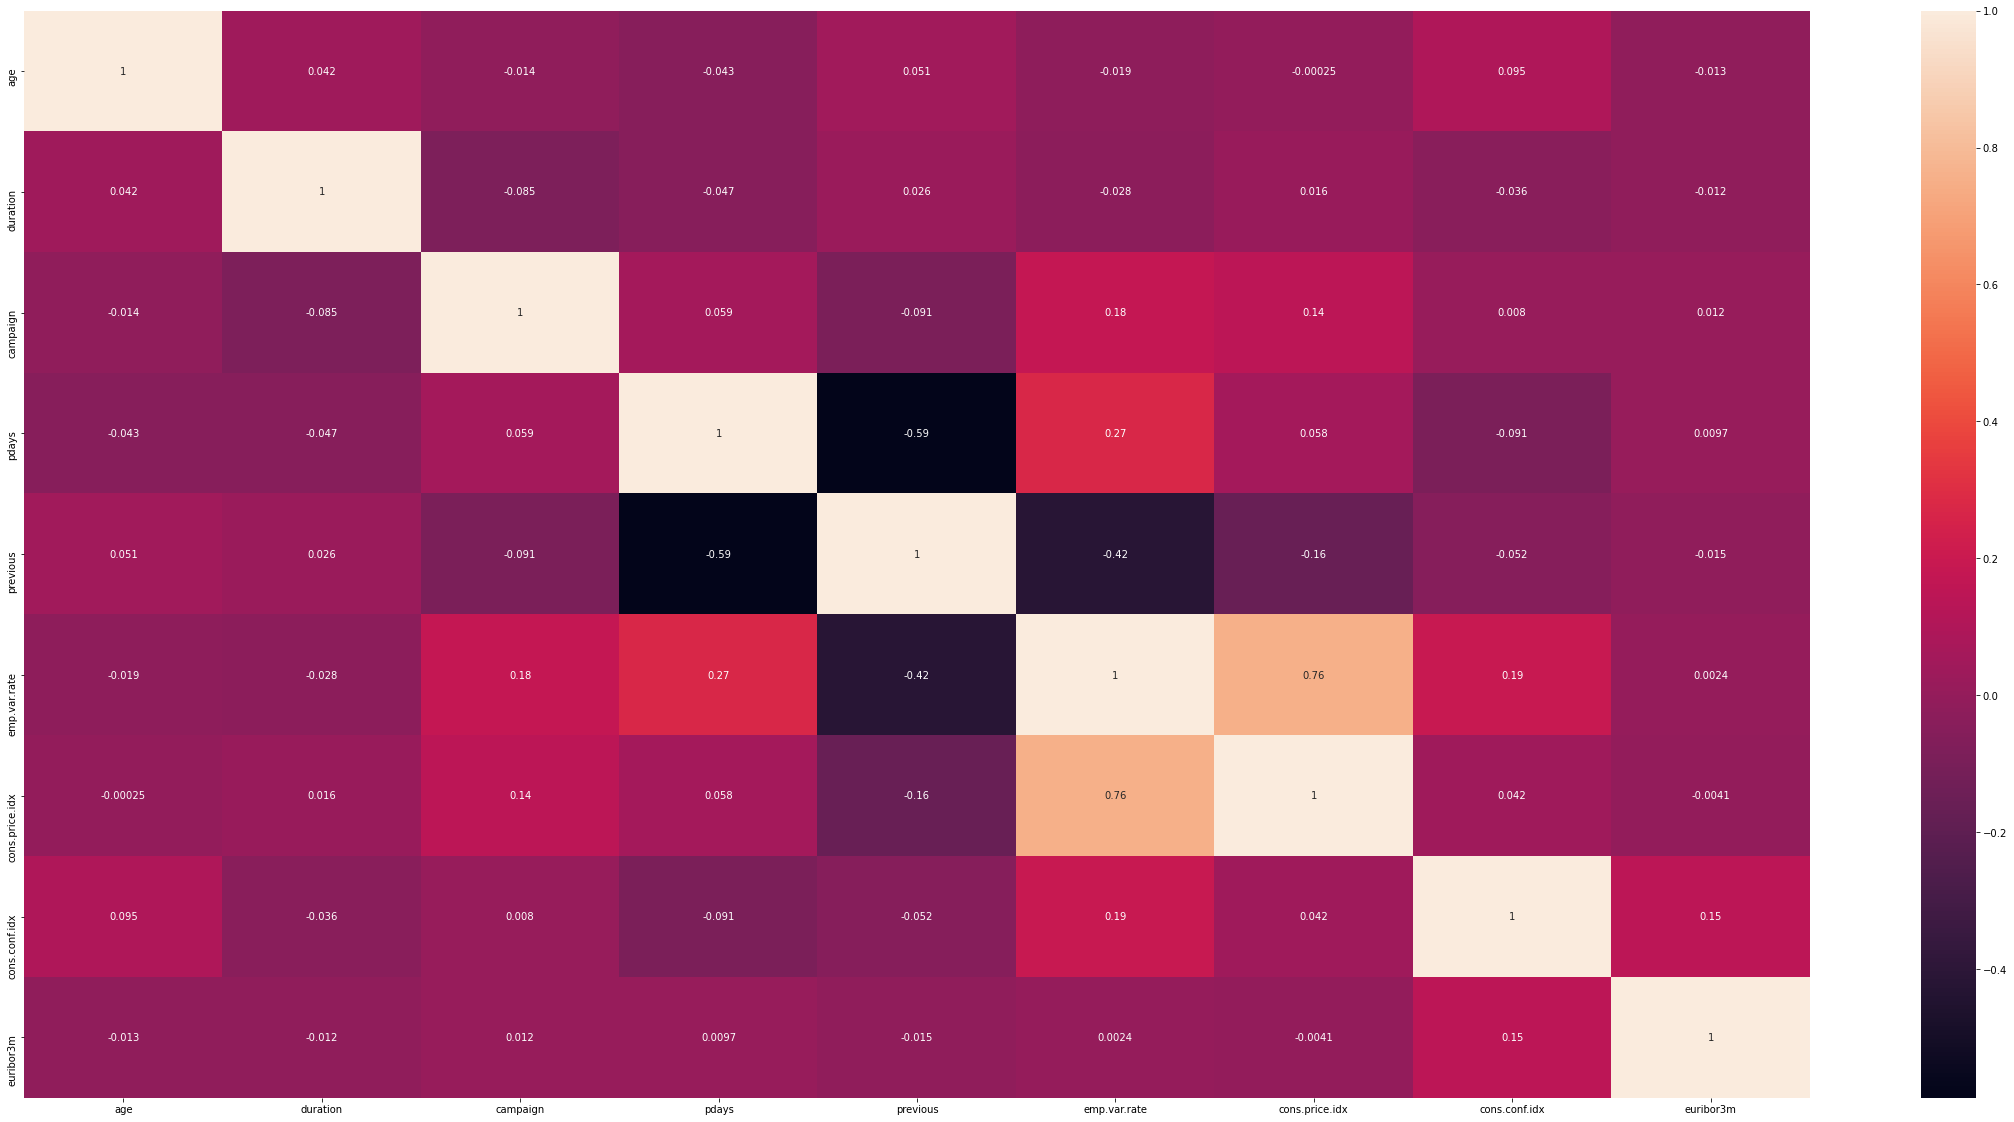

In [513]:
sn.heatmap(corrMatrix,annot=True)

##### - Data visualizations

<AxesSubplot:xlabel='age', ylabel='Density'>

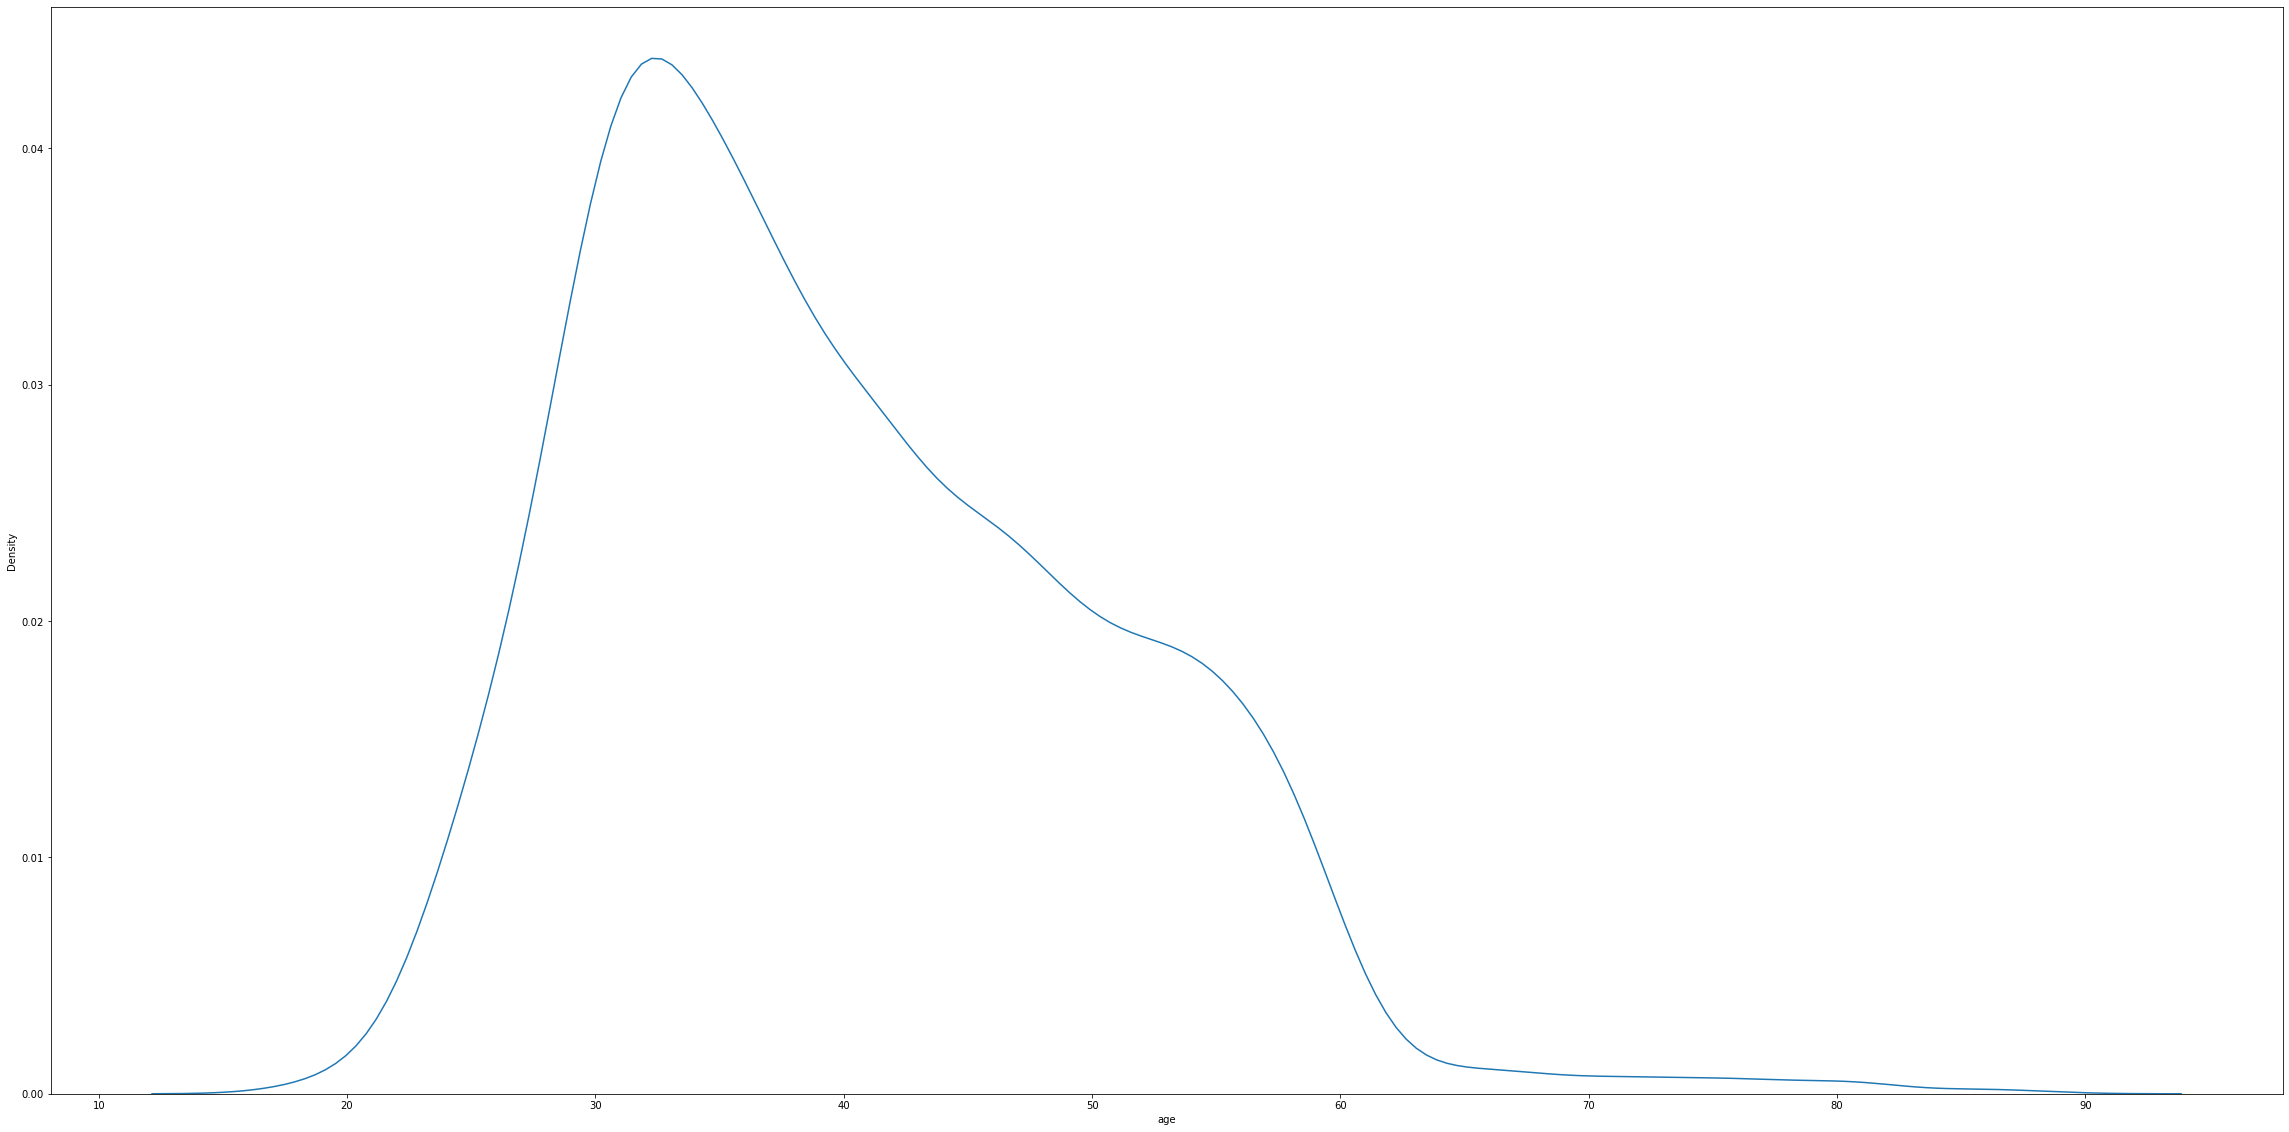

In [514]:
sn.kdeplot(df['age'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

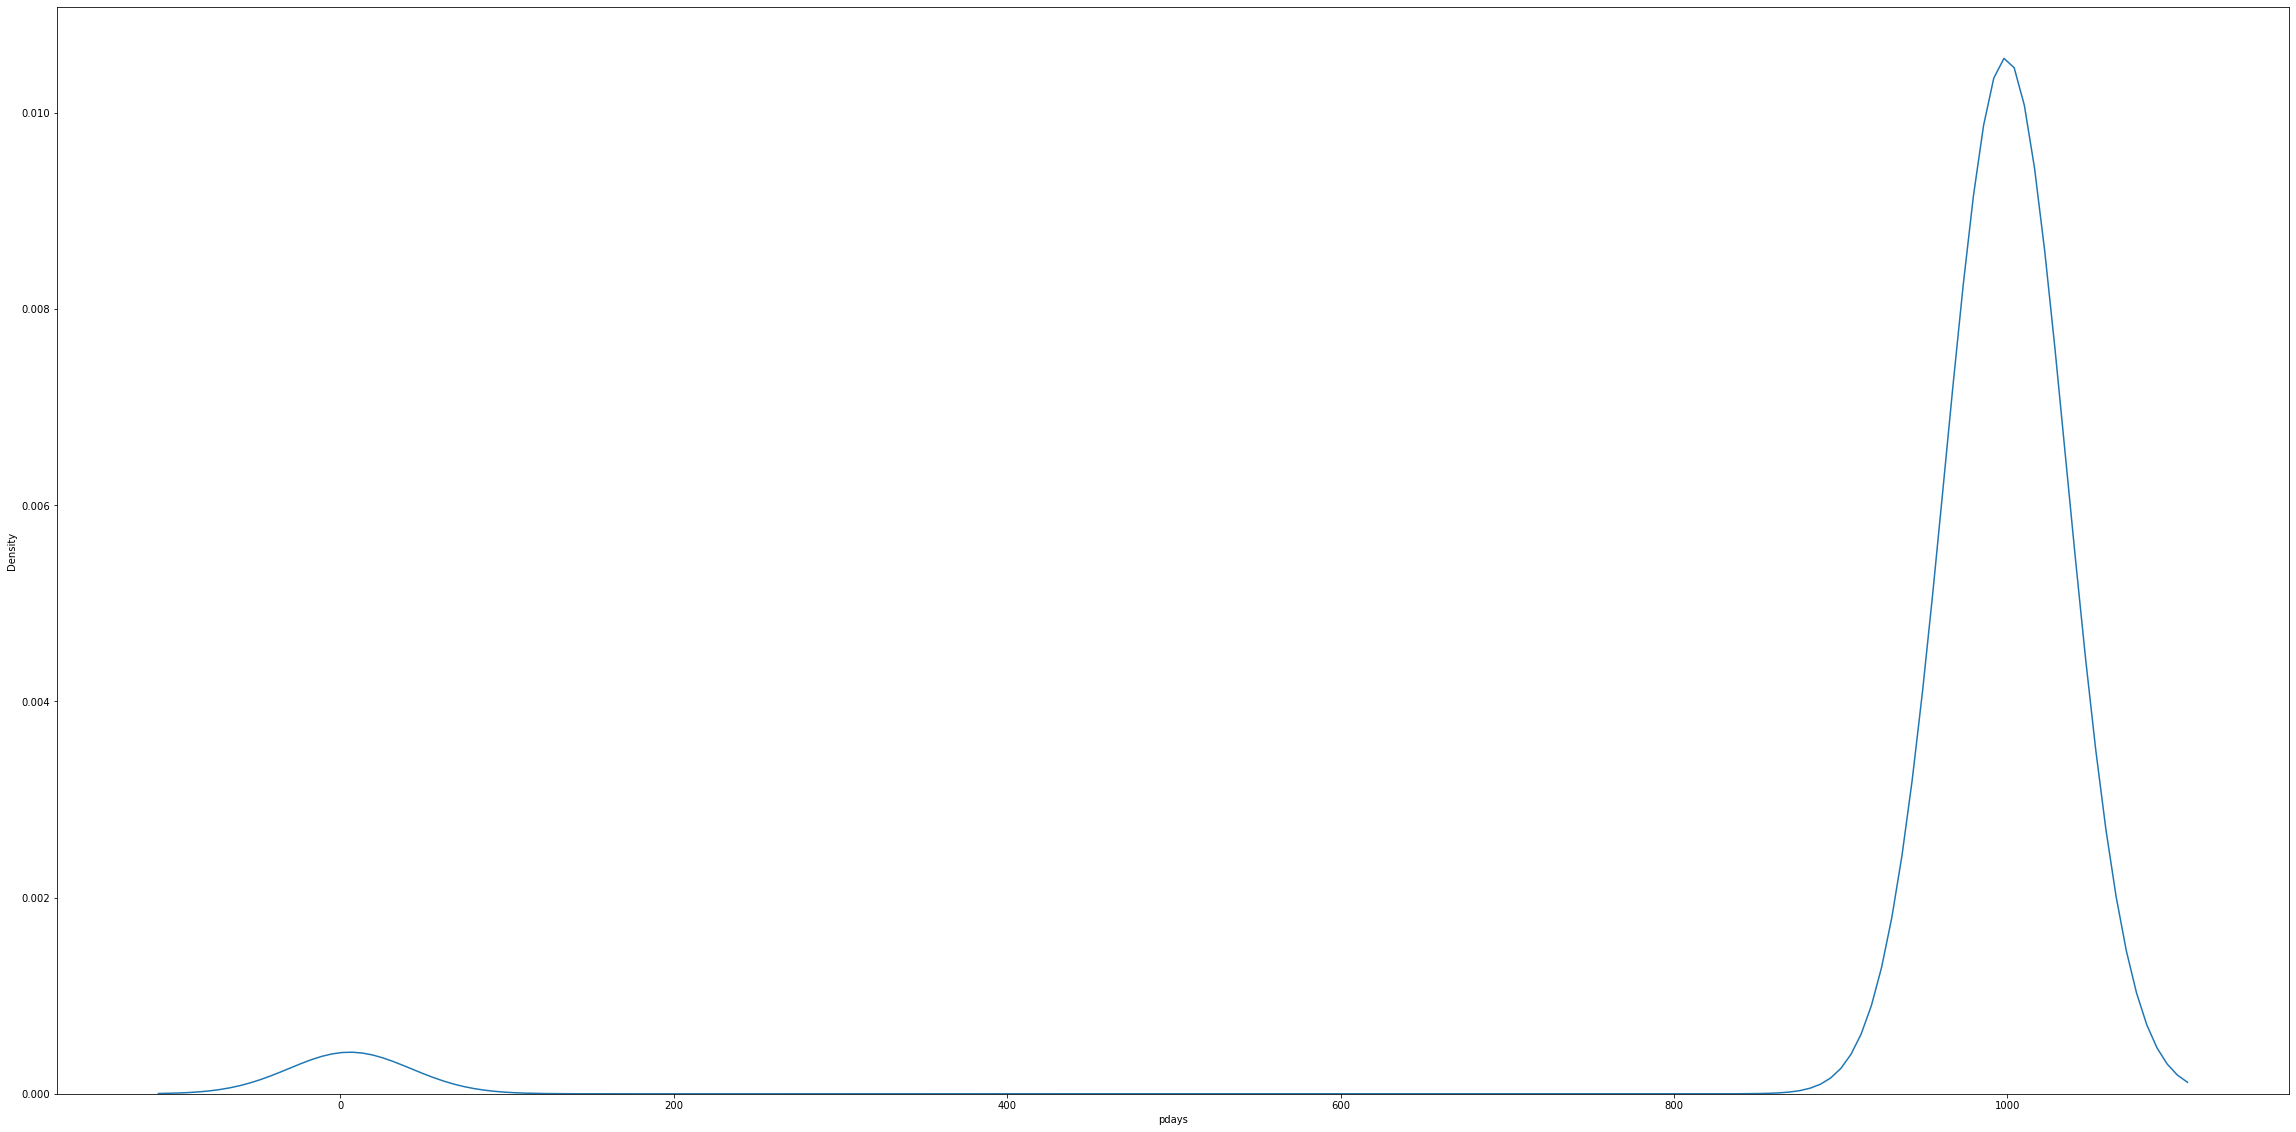

In [515]:
sn.kdeplot(df['pdays'])

<AxesSubplot:xlabel='campaign', ylabel='Density'>

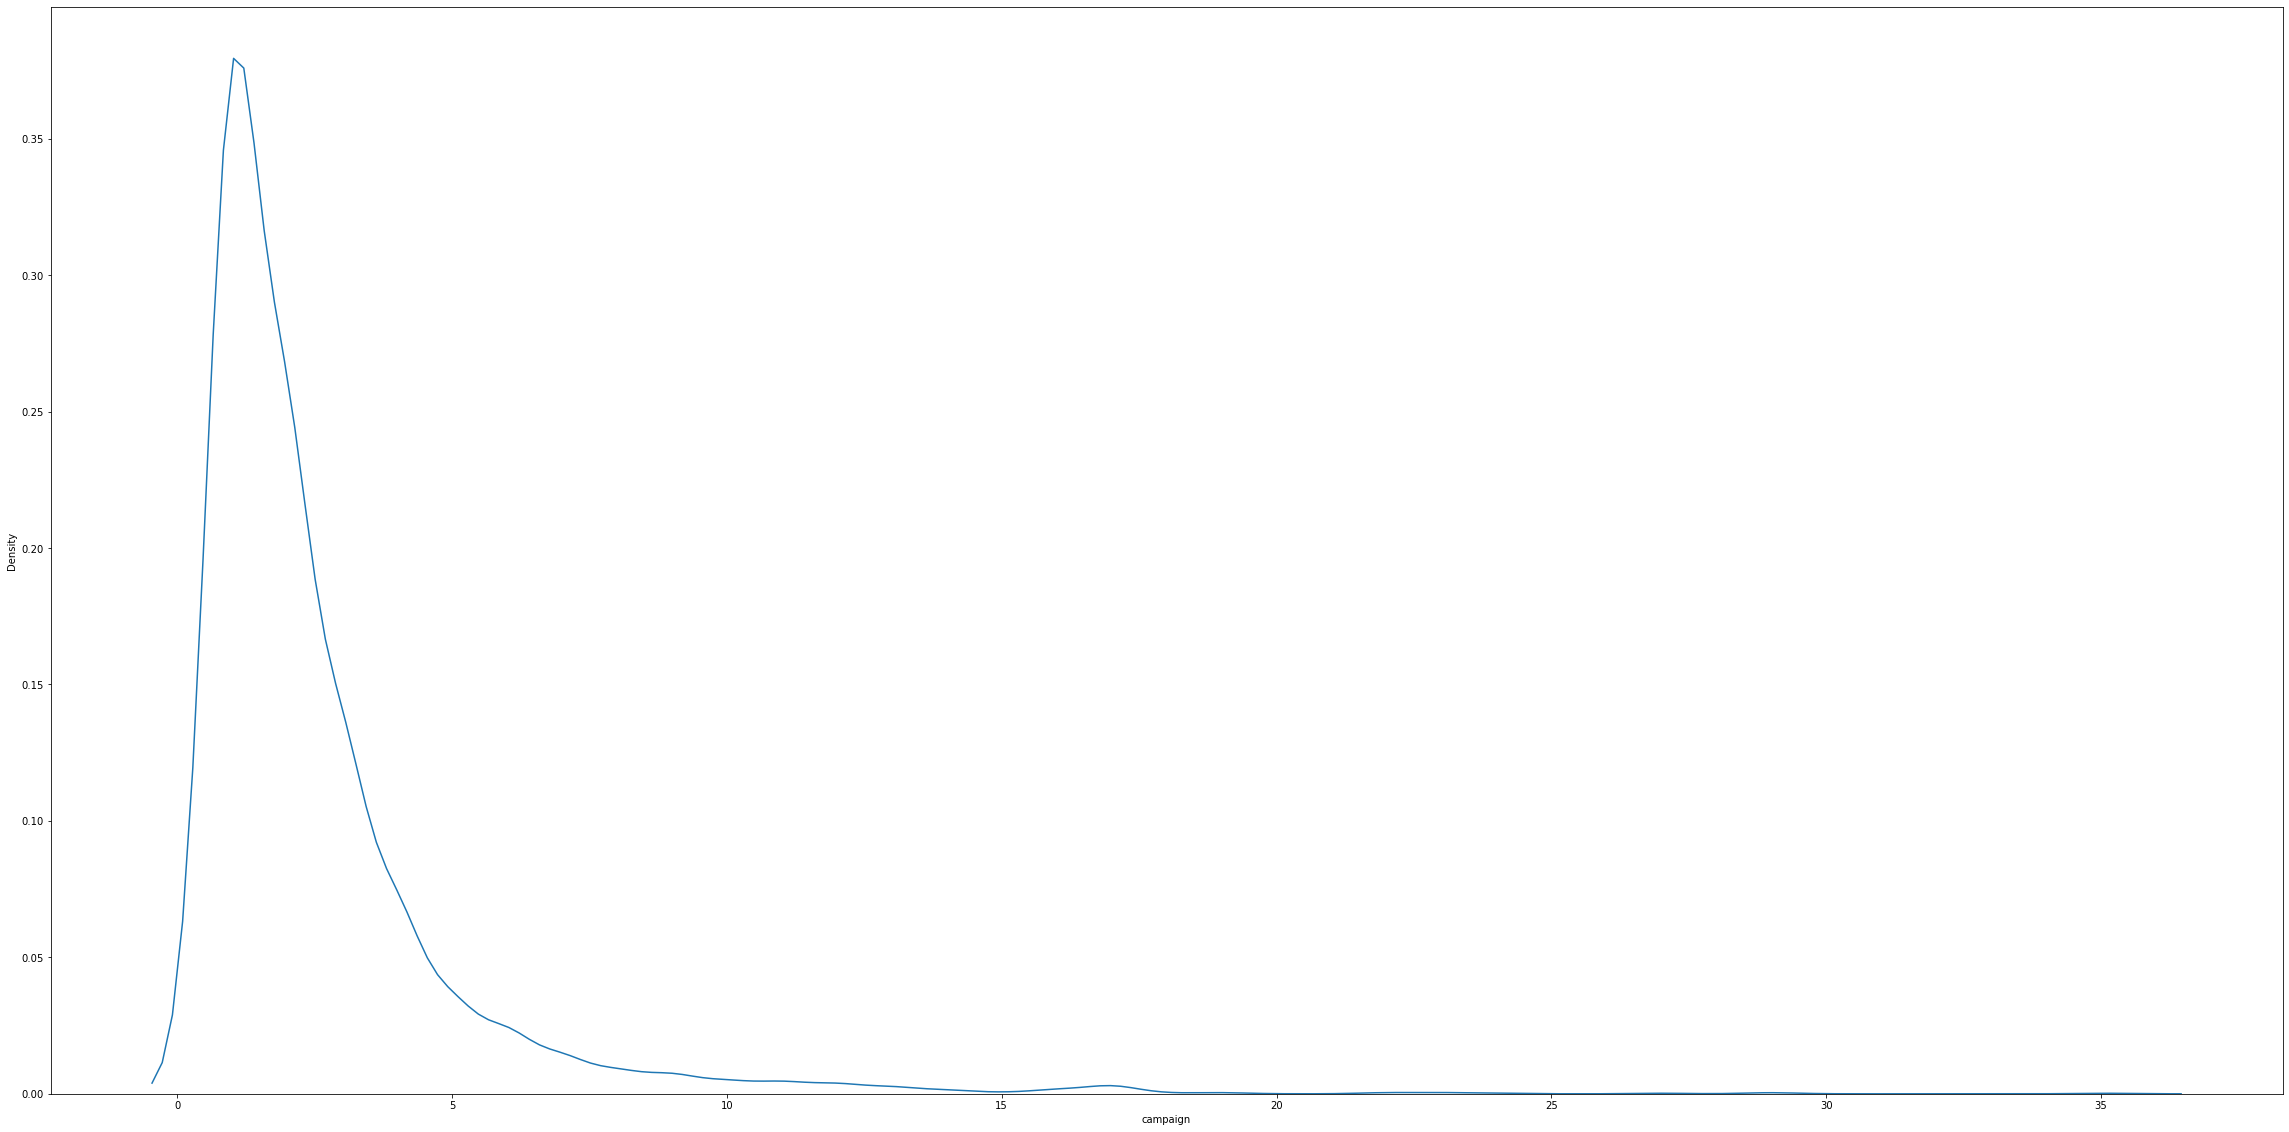

In [516]:
sn.kdeplot(df['campaign'])

### 3) Prepare the dataset

##### - Fill in the missing values

In [517]:
df['duration'] = df['duration'].fillna(np.mean(df['duration']))
df['campaign'] = df['campaign'].fillna(np.mean(df['campaign']))
df['previous'] = df['previous'].fillna(np.mean(df['previous']))
df['emp.var.rate'] = df['emp.var.rate'].fillna(np.mean(df['emp.var.rate']))
df['cons.price.idx'] = df['cons.price.idx'].fillna(np.mean(df['cons.price.idx']))
df['cons.conf.idx'] = df['cons.conf.idx'].fillna(np.mean(df['cons.conf.idx']))
df['euribor3m'] = df['euribor3m'].fillna(np.mean(df['euribor3m']))

In [518]:
df['nr.employed'].value_counts()

5228.1    1625
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
no           1
5176.3       1
Name: nr.employed, dtype: int64

In [519]:
df[df['nr.employed'] == 'no']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,...,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [520]:
df.loc[df['nr.employed'] == 'no','nr.employed'] = df['nr.employed'].value_counts()[:1].index.tolist()[0]
df['nr.employed'] = df['nr.employed'].fillna(df['nr.employed'].value_counts()[:1].index.tolist()[0])
df['nr.employed'].value_counts()

5228.1    1627
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
5176.3       1
Name: nr.employed, dtype: int64

In [521]:
lista = df[df['y'] != 'no']
lista

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1.0,12,2.0,success,-1.8,93.369,-34.8,0.639,5008.7,yes
25,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
53,24,technician,married,university.degree,no,yes,yes,cellular,sep,tue,...,2.0,3,1.0,success,-3.4,92.379,-29.8,0.770,5017.5,yes
59,60,admin.,divorced,professional.course,no,yes,no,cellular,sep,wed,...,1.0,999,1.0,failure,-1.1,94.199,-37.5,0.886,4963.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,74,retired,married,university.degree,no,yes,yes,cellular,aug,wed,...,3.0,999,0.0,nonexistent,-2.9,92.201,-31.4,0.854,5076.2,yes
4066,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1.0,999,2.0,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
4069,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
4088,47,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1.0,3,2.0,success,-3.4,92.379,-29.8,0.771,5017.5,yes


In [522]:
list1 = lista[lista['y'] != 'yes']
list1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,...,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,5228.1,NaN


In [523]:
df['y'].isna()[780]

True

In [524]:
df['y'][780] = 'no'

<ipython-input-524-16c88f21fdc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][780] = 'no'


In [525]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### - Quantify categorical data

In [526]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [527]:
for col in df1.columns:
    if df1[col].dtype == object:
        df1[col] = df1[col].astype('category').cat.codes
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2.0,999,0.0,1,-1.8,92.893,-46.2,1.313,6,0
1,39,7,2,3,0,0,0,1,6,0,...,4.0,999,0.0,1,1.1,93.994,-36.4,4.855,8,0
2,25,7,1,3,0,2,0,1,4,4,...,1.0,999,0.0,1,1.4,94.465,-41.8,4.962,10,0
3,38,7,1,2,0,1,1,1,4,0,...,3.0,999,0.0,1,1.4,94.465,-41.8,4.959,10,0
4,47,0,1,6,0,2,0,0,7,1,...,1.0,999,0.0,1,-0.1,93.200,-42.0,4.191,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,1.0,999,0.0,1,1.4,93.918,-42.7,4.958,10,0
4115,39,0,1,3,0,2,0,1,3,0,...,1.0,999,0.0,1,1.4,93.918,-42.7,4.959,10,0
4116,27,8,2,3,0,0,0,0,6,1,...,2.0,999,1.0,0,-1.8,92.893,-46.2,1.354,6,0
4117,58,0,1,3,0,0,0,0,1,0,...,1.0,999,0.0,1,1.4,93.444,-36.1,4.966,10,0


In [528]:
df1.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed          int8
y                    int8
dtype: object

##### - Create attributes

In [529]:
df1['MonthlyIndicator'] = df1['cons.price.idx'] + df1['cons.conf.idx']
df1['MonthlyIndicator'].head()

0    46.693
1    57.594
2    52.665
3    52.665
4    51.200
Name: MonthlyIndicator, dtype: float64

In [530]:
df1.drop(['cons.price.idx', 'cons.conf.idx'], axis = 1, inplace=True)

In [531]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y,MonthlyIndicator
0,30,1,1,2,0,2,0,0,6,0,487.0,2.0,999,0.0,1,-1.8,1.313,6,0,46.693
1,39,7,2,3,0,0,0,1,6,0,346.0,4.0,999,0.0,1,1.1,4.855,8,0,57.594
2,25,7,1,3,0,2,0,1,4,4,227.0,1.0,999,0.0,1,1.4,4.962,10,0,52.665
3,38,7,1,2,0,1,1,1,4,0,17.0,3.0,999,0.0,1,1.4,4.959,10,0,52.665
4,47,0,1,6,0,2,0,0,7,1,58.0,1.0,999,0.0,1,-0.1,4.191,9,0,51.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,53.0,1.0,999,0.0,1,1.4,4.958,10,0,51.218
4115,39,0,1,3,0,2,0,1,3,0,219.0,1.0,999,0.0,1,1.4,4.959,10,0,51.218
4116,27,8,2,3,0,0,0,0,6,1,64.0,2.0,999,1.0,0,-1.8,1.354,6,0,46.693
4117,58,0,1,3,0,0,0,0,1,0,528.0,1.0,999,0.0,1,1.4,4.966,10,0,57.344


In [532]:
df1['QuarterlyIndicator'] = df1['nr.employed'] + df1['emp.var.rate']
df1['QuarterlyIndicator'].head()

0     4.2
1     9.1
2    11.4
3    11.4
4     8.9
Name: QuarterlyIndicator, dtype: float64

In [533]:
df1.drop(['nr.employed', 'emp.var.rate'], axis = 1, inplace=True)

In [534]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator
0,30,1,1,2,0,2,0,0,6,0,487.0,2.0,999,0.0,1,1.313,0,46.693,4.2
1,39,7,2,3,0,0,0,1,6,0,346.0,4.0,999,0.0,1,4.855,0,57.594,9.1
2,25,7,1,3,0,2,0,1,4,4,227.0,1.0,999,0.0,1,4.962,0,52.665,11.4
3,38,7,1,2,0,1,1,1,4,0,17.0,3.0,999,0.0,1,4.959,0,52.665,11.4
4,47,0,1,6,0,2,0,0,7,1,58.0,1.0,999,0.0,1,4.191,0,51.200,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,53.0,1.0,999,0.0,1,4.958,0,51.218,11.4
4115,39,0,1,3,0,2,0,1,3,0,219.0,1.0,999,0.0,1,4.959,0,51.218,11.4
4116,27,8,2,3,0,0,0,0,6,1,64.0,2.0,999,1.0,0,1.354,0,46.693,4.2
4117,58,0,1,3,0,0,0,0,1,0,528.0,1.0,999,0.0,1,4.966,0,57.344,11.4


In [535]:
corrMatrix2 = df1.corr()
corrMatrix2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator
age,1.000000,0.014618,-0.393795,-0.125520,0.160562,-0.007279,-0.008605,0.012700,-0.020909,-0.029297,0.041511,-0.014021,-0.043425,0.050682,0.012975,-0.012592,0.060374,0.094191,-0.039489
job,0.014618,1.000000,0.013616,0.134717,-0.040194,0.002725,-0.000800,-0.011981,-0.016835,-0.004120,-0.015924,0.002260,-0.007936,0.024173,-0.020159,-0.012638,0.026725,0.035967,-0.032414
marital,-0.393795,0.013616,1.000000,0.104367,-0.082149,0.002659,-0.005926,-0.067432,-0.033537,0.007184,-0.005695,0.002662,-0.040722,0.040190,0.001310,-0.006280,0.043833,-0.027350,-0.072591
education,-0.125520,0.134717,0.104367,1.000000,-0.200550,0.030291,-0.021281,-0.116686,-0.080912,-0.042302,0.000300,0.015827,-0.060828,0.045984,0.029832,-0.028481,0.067316,0.095080,-0.063407
default,0.160562,-0.040194,-0.082149,-0.200550,1.000000,-0.011599,0.007872,0.149737,-0.008608,-0.014882,-0.019807,0.019794,0.089457,-0.091526,-0.000039,-0.003814,-0.076627,0.040175,0.170938
housing,-0.007279,0.002725,0.002659,0.030291,-0.011599,1.000000,0.064208,-0.073007,-0.039840,0.012389,-0.012099,-0.017709,-0.021673,0.025518,0.002946,-0.018293,0.000957,-0.042310,-0.034081
loan,-0.008605,-0.000800,-0.005926,-0.021281,0.007872,0.064208,1.000000,0.004046,-0.024046,0.002608,-0.019500,-0.023438,0.006321,-0.005601,0.006759,0.034907,-0.012709,0.007525,0.014336
contact,0.012700,-0.011981,-0.067432,-0.116686,0.149737,-0.073007,0.004046,1.000000,0.258733,-0.009579,-0.028252,0.085070,0.120670,-0.215597,0.129369,-0.003072,-0.137401,0.315235,0.264357
month,-0.020909,-0.016835,-0.033537,-0.080912,-0.008608,-0.039840,-0.024046,0.258733,1.000000,0.034290,0.017764,-0.083592,-0.054892,0.107112,-0.065263,0.008086,0.005049,-0.038171,-0.274862
day_of_week,-0.029297,-0.004120,0.007184,-0.042302,-0.014882,0.012389,0.002608,-0.009579,0.034290,1.000000,0.005745,-0.038014,0.013141,-0.016592,-0.001393,0.000793,-0.006370,0.036322,0.034730


<AxesSubplot:>

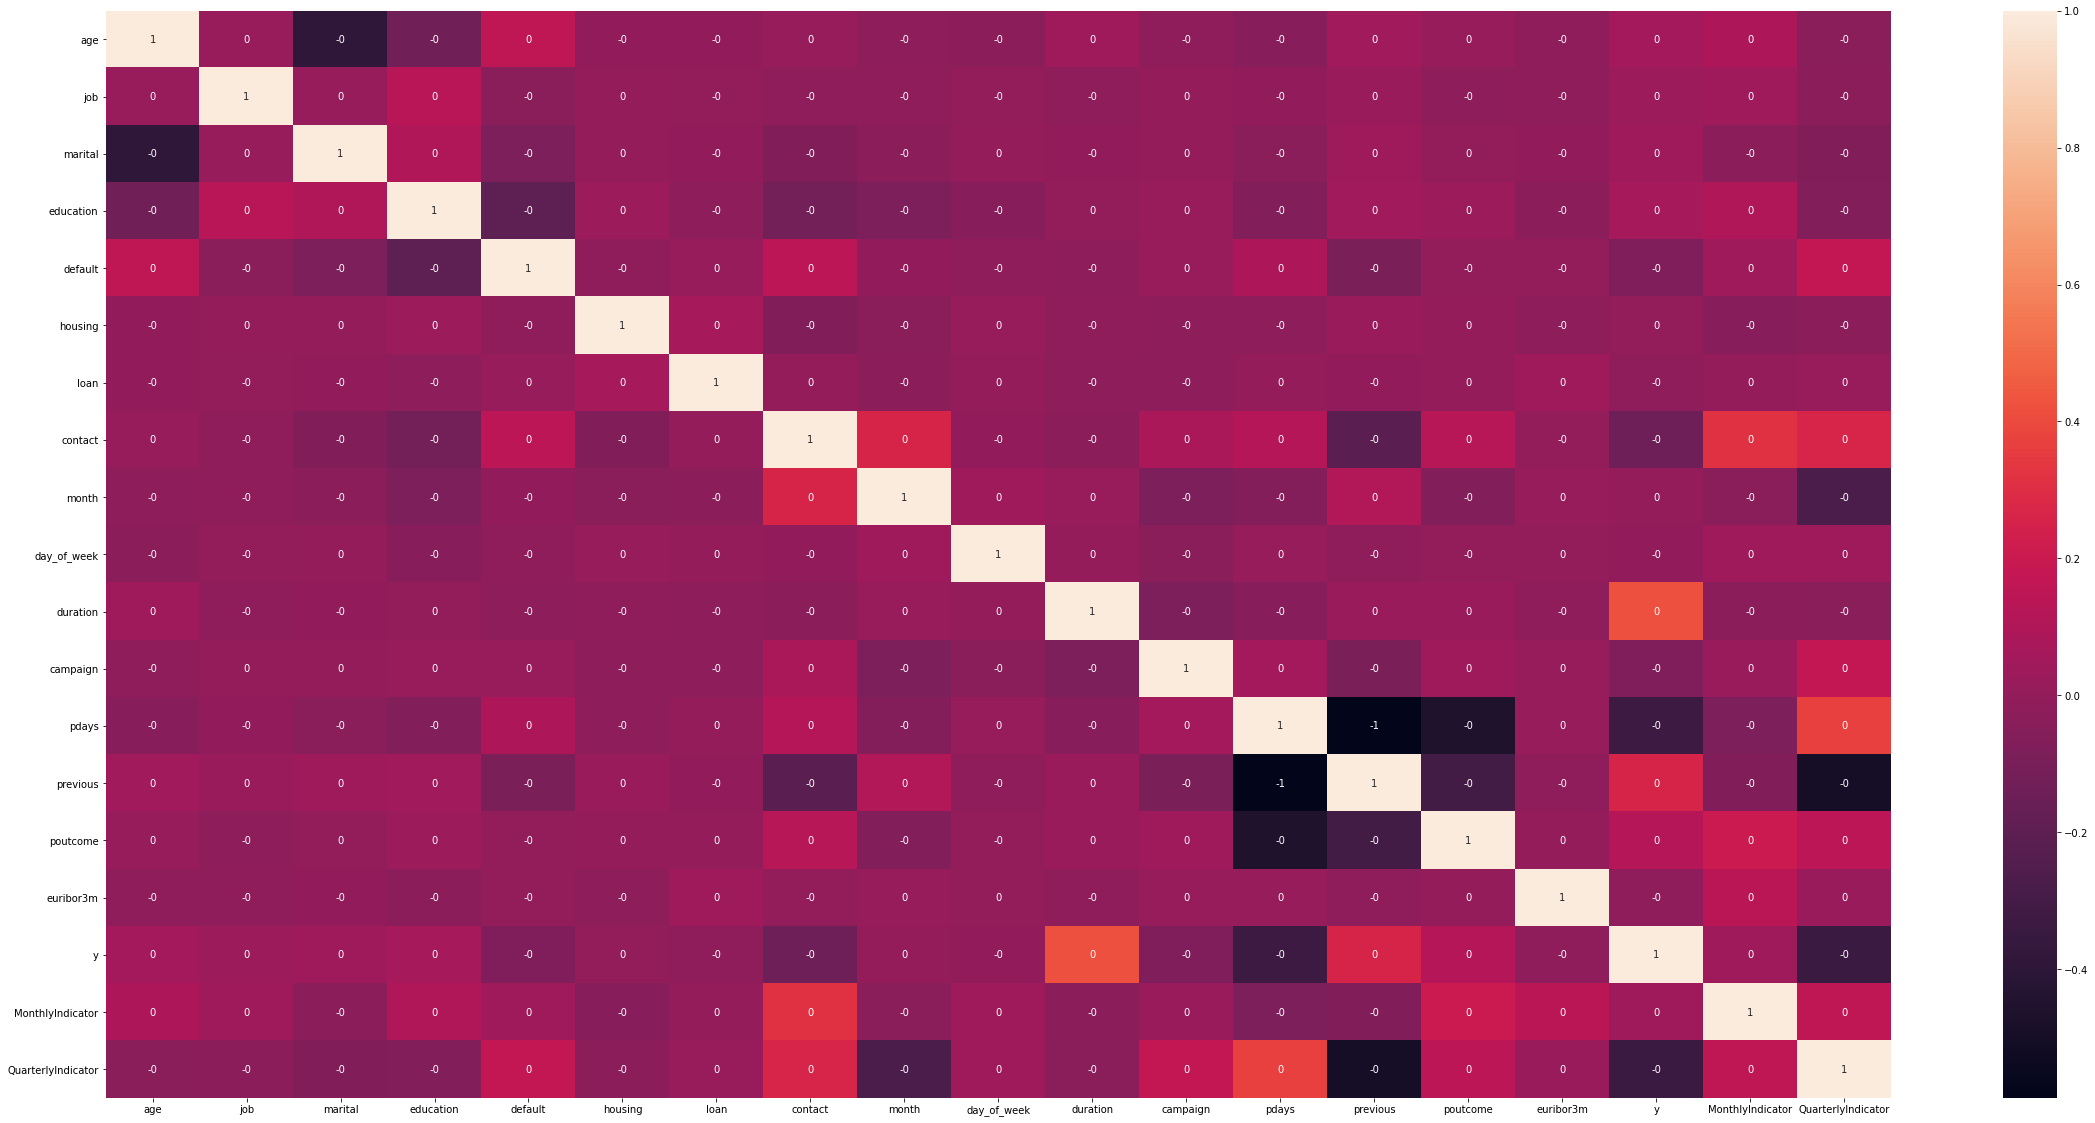

In [536]:
sn.heatmap(corrMatrix2, annot=True, fmt='.0f')
#age i marital su u jakoj korelaciji samo jedna sa drugom pa ih obe izbacujemo
#duration izbacujemo jer nema doprinosa u pravljenu realnog prediktivnog modela
#pdays izbacujemo jer vidimo da je u visokoj korelaciji sa previous i poutcome 

In [537]:
new_col=['job','education', 'default', 'housing', 'loan','contact', 'month','day_of_week', 'campaign', 'previous',
         'poutcome','euribor3m', 'y','MonthlyIndicator', 'QuarterlyIndicator']

In [538]:
df1[new_col].head()

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator
0,1,2,0,2,0,0,6,0,2.0,0.0,1,1.313,0,46.693,4.2
1,7,3,0,0,0,1,6,0,4.0,0.0,1,4.855,0,57.594,9.1
2,7,3,0,2,0,1,4,4,1.0,0.0,1,4.962,0,52.665,11.4
3,7,2,0,1,1,1,4,0,3.0,0.0,1,4.959,0,52.665,11.4
4,0,6,0,2,0,0,7,1,1.0,0.0,1,4.191,0,51.200,8.9


In [539]:
df2 = df1[new_col]

In [540]:
df2

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator
0,1,2,0,2,0,0,6,0,2.0,0.0,1,1.313,0,46.693,4.2
1,7,3,0,0,0,1,6,0,4.0,0.0,1,4.855,0,57.594,9.1
2,7,3,0,2,0,1,4,4,1.0,0.0,1,4.962,0,52.665,11.4
3,7,2,0,1,1,1,4,0,3.0,0.0,1,4.959,0,52.665,11.4
4,0,6,0,2,0,0,7,1,1.0,0.0,1,4.191,0,51.200,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,0,2,2,0,3,2,1.0,0.0,1,4.958,0,51.218,11.4
4115,0,3,0,2,0,1,3,0,1.0,0.0,1,4.959,0,51.218,11.4
4116,8,3,0,0,0,0,6,1,2.0,1.0,0,1.354,0,46.693,4.2
4117,0,3,0,0,0,0,1,0,1.0,0.0,1,4.966,0,57.344,11.4


In [541]:
from sklearn.preprocessing import MinMaxScaler
X = df2.drop('y', axis=1) 
Y = df2['y'] 
r = MinMaxScaler(feature_range=(0, 1))
normX = r.fit_transform(X)
print(normX[0:5,:])

[[9.09090909e-02 2.85714286e-01 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 6.66666667e-01 0.00000000e+00
  2.94117647e-02 0.00000000e+00 5.00000000e-01 1.32981201e-04
  7.50253332e-02 4.24000000e-01]
 [6.36363636e-01 4.28571429e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 6.66666667e-01 0.00000000e+00
  8.82352941e-02 0.00000000e+00 5.00000000e-01 8.27700102e-04
  2.87454205e-01 8.16000000e-01]
 [6.36363636e-01 4.28571429e-01 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 4.44444444e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 5.00000000e-01 8.48686811e-04
  1.91402292e-01 1.00000000e+00]
 [6.36363636e-01 2.85714286e-01 0.00000000e+00 5.00000000e-01
  5.00000000e-01 1.00000000e+00 4.44444444e-01 0.00000000e+00
  5.88235294e-02 0.00000000e+00 5.00000000e-01 8.48098398e-04
  1.91402292e-01 1.00000000e+00]
 [0.00000000e+00 8.57142857e-01 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 7.77777778e-01 2.50000000e-01


# Classification:

### 5) Learn at least three predictive models (with common parameter settings)

In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=10)

In [544]:
#RANDOM FOREST
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rfModel = DecisionTreeClassifier(max_depth = 10)
rfModel.fit(X_train, Y_train)
predictions = rfModel.predict(X_train)
pd.DataFrame({'stvarno':Y_train, 'predvidjeno':predictions}).head(13)

,stvarno,predvidjeno
2144,0,0
3560,0,0
1852,0,0
3456,0,0
2247,0,0
2800,0,0
3729,0,0
204,0,0
3564,0,0
3314,0,0


In [415]:
acc = accuracy_score(Y_train, predictions)
print(f'Tacnost predvidjanja je {acc: .2f}')

Tacnost predvidjanja je  0.95


In [416]:
result = cross_val_score(rfModel, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(result.mean(), result.std())

0.8820633890811227 0.011960645641404106


In [417]:
print(recall_score(Y_test, rfModel.predict(X_test)))
print(precision_score(Y_test, rfModel.predict(X_test)))
print(f1_score(Y_test, rfModel.predict(X_test)))

0.24087591240875914
0.4925373134328358
0.3235294117647059


In [418]:
confusion_matrix(Y_test, rfModel.predict(X_test))

array([[1065,   34],
       [ 104,   33]], dtype=int64)

In [419]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nbModel = GaussianNB()
nbModel.fit(X_train, Y_train)
predictions = nbModel.predict(X_train)
pd.DataFrame({'stvarno':Y_train, 'predvidjeno':predictions}).head(13)

,stvarno,predvidjeno
2144,0,1
3560,0,0
1852,0,1
3456,0,0
2247,0,1
2800,0,1
3729,0,0
204,0,1
3564,0,0
3314,0,0


In [420]:
acc = accuracy_score(Y_train, predictions)
print(f'Tacnost predvidjanja je {acc: .2f}')

Tacnost predvidjanja je  0.68


In [421]:
result = cross_val_score(nbModel, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(result.mean(), result.std())

0.6871419646289889 0.06647548318157541


In [422]:
print(recall_score(Y_test, nbModel.predict(X_test)))
print(precision_score(Y_test, nbModel.predict(X_test)))
print(f1_score(Y_test, nbModel.predict(X_test)))

0.7518248175182481
0.22440087145969498
0.34563758389261745


In [423]:
confusion_matrix(Y_test, nbModel.predict(X_test))

array([[743, 356],
       [ 34, 103]], dtype=int64)

In [424]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier()
knnModel.fit(X_train, Y_train)
predictions = knnModel.predict(X_train)
pd.DataFrame({'stvarno':Y_train, 'predvidjeno':predictions}).head(13)

,stvarno,predvidjeno
2144,0,0
3560,0,0
1852,0,1
3456,0,0
2247,0,0
2800,0,0
3729,0,0
204,0,0
3564,0,0
3314,0,0


In [425]:
acc = accuracy_score(Y_train, predictions)
print(f'Tacnost predvidjanja je {acc: .2f}')

Tacnost predvidjanja je  0.91


In [426]:
result = cross_val_score(knnModel, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(result.mean(), result.std())

0.8831098615916956 0.007078826180240075


In [427]:
print(recall_score(Y_test, knnModel.predict(X_test)))
print(precision_score(Y_test, knnModel.predict(X_test)))
print(f1_score(Y_test, knnModel.predict(X_test)))

0.2116788321167883
0.4027777777777778
0.27751196172248804


In [428]:
confusion_matrix(Y_test, knnModel.predict(X_test))

array([[1056,   43],
       [ 108,   29]], dtype=int64)

In [429]:
#Logisticka regresija
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()
logModel.fit(X_train, Y_train)
predictions = logModel.predict(X_train)
pd.DataFrame({'stvarno':Y_train, 'predvidjeno':predictions}).head(13)

C:\Users\Dandadanica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,stvarno,predvidjeno
2144,0,0
3560,0,0
1852,0,0
3456,0,0
2247,0,0
2800,0,0
3729,0,0
204,0,1
3564,0,0
3314,0,0


In [430]:
acc = accuracy_score(Y_train, predictions)
print(f'Tacnost predvidjanja je {acc: .2f}')

Tacnost predvidjanja je  0.90


In [431]:
result = cross_val_score(logModel, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(result.mean(), result.std())

C:\Users\Dandadanica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dandadanica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.902532679738562 0.014593257005948396


C:\Users\Dandadanica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dandadanica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [432]:
print(recall_score(Y_test, logModel.predict(X_test)))
print(precision_score(Y_test, logModel.predict(X_test)))
print(f1_score(Y_test, logModel.predict(X_test)))

0.145985401459854
0.7142857142857143
0.24242424242424243


In [433]:
confusion_matrix(Y_test, logModel.predict(X_test))

array([[1091,    8],
       [ 117,   20]], dtype=int64)

### Adjust the decision boundary of predictive models and compare the quality of the model before and after the boundary change

In [436]:
prob = rfModel.predict_proba(X_test)[:, 1] >= 0.9
pd.DataFrame({'stvarno': Y_test, 'predvidjeno': rfModel.predict(X_test), 'verovatnoca': prob})
print(confusion_matrix(Y_test, rfModel.predict(X_test)))
print(confusion_matrix(Y_test, prob))

[[1065   34]
 [ 104   33]]
[[1075   24]
 [ 112   25]]


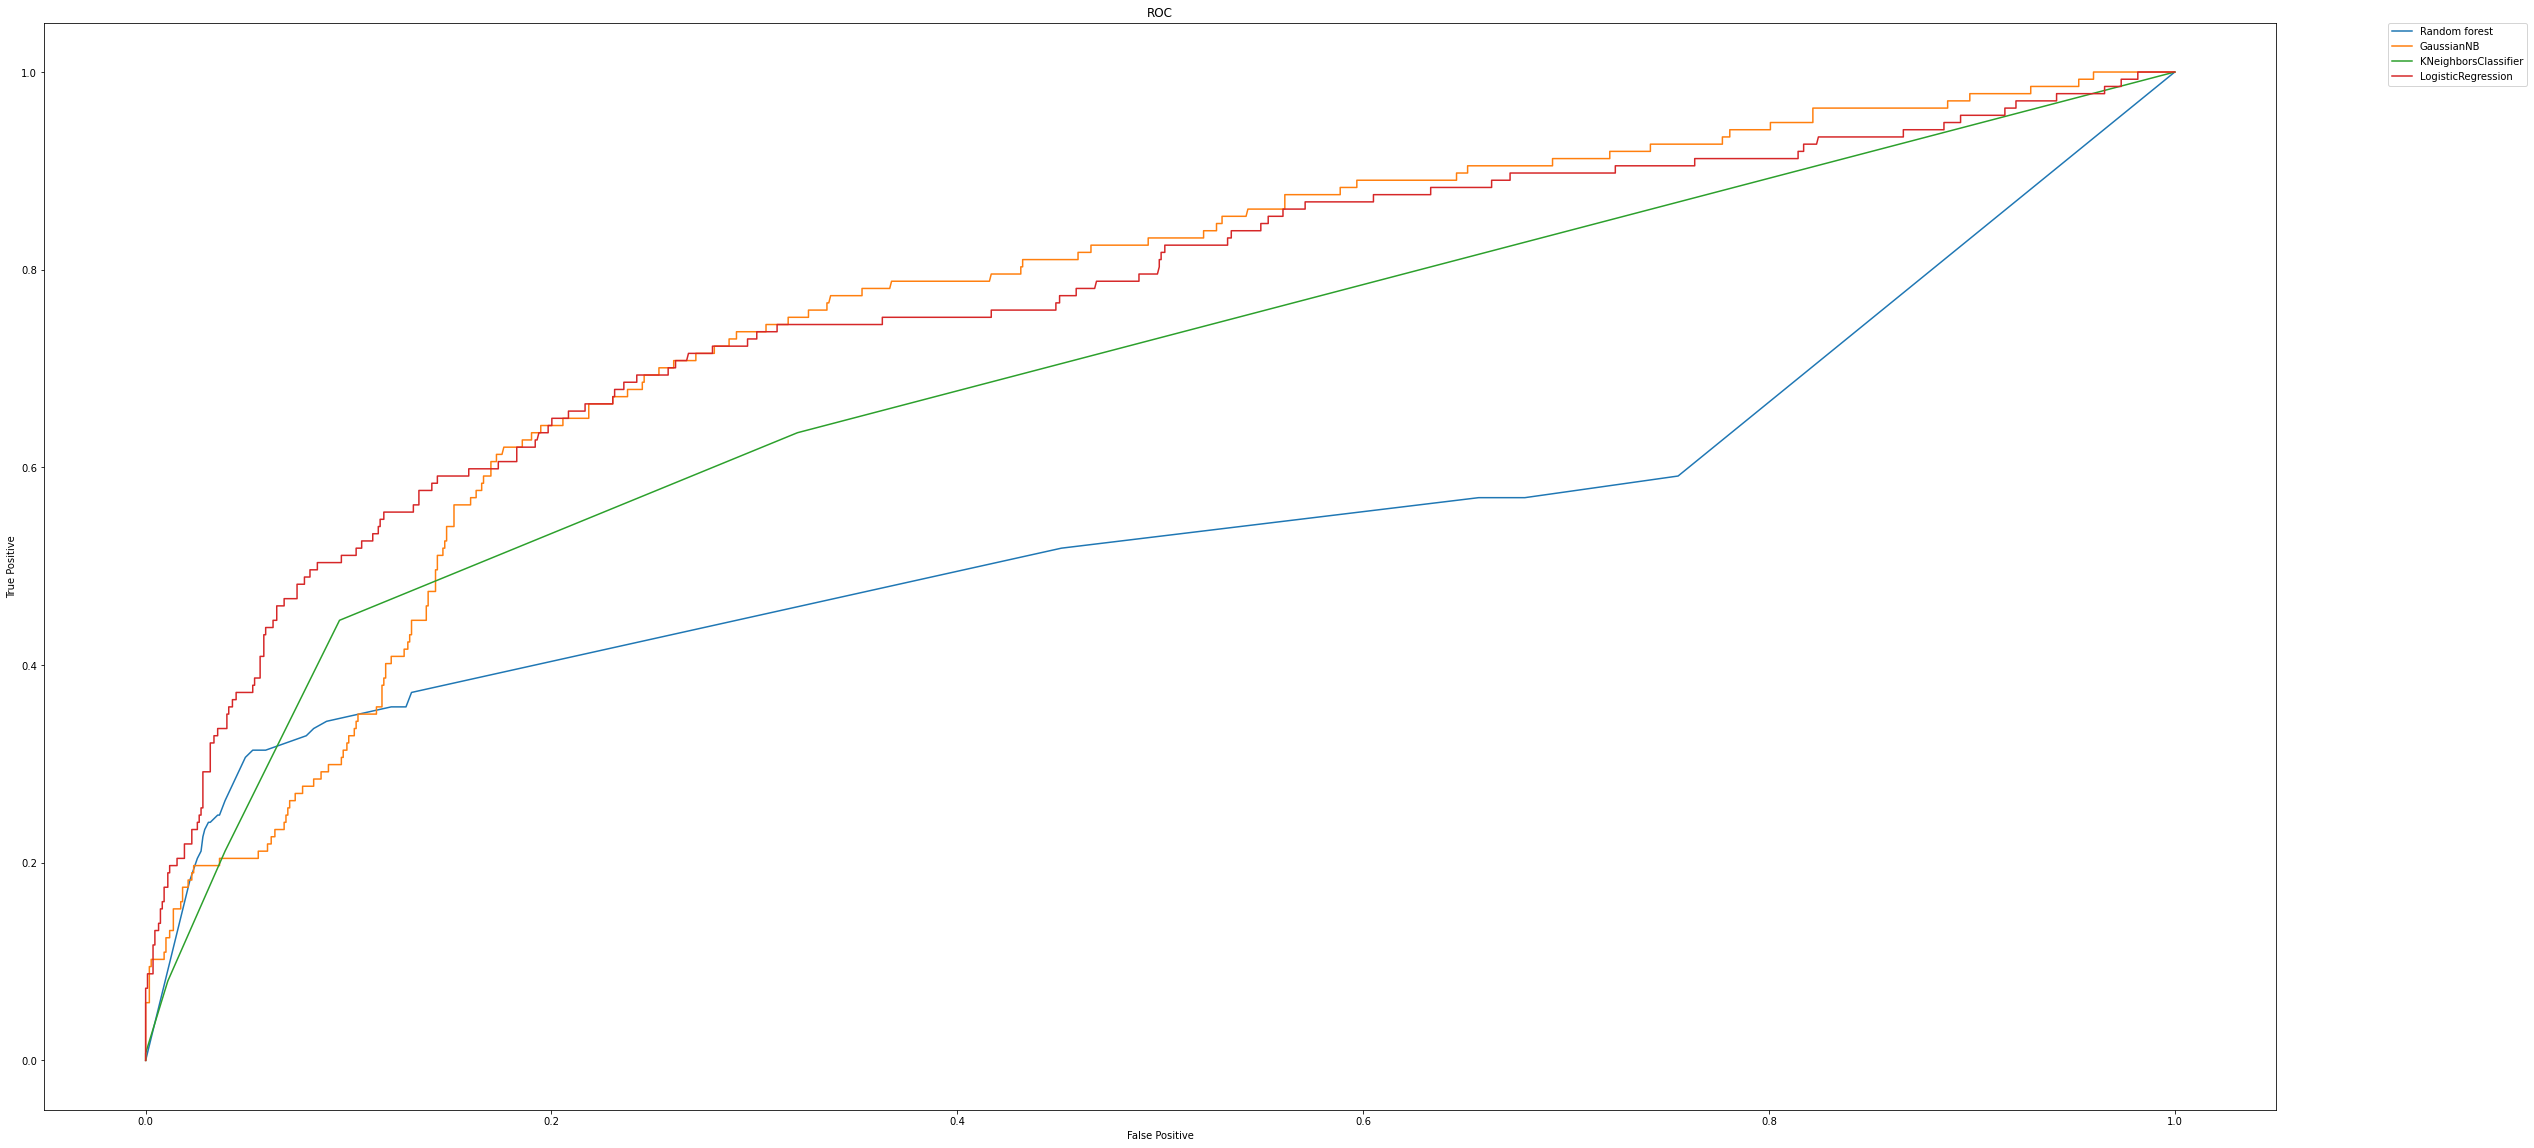

In [437]:
from sklearn.metrics import roc_curve
probasRF = rfModel.predict_proba(X_test)
pred_probaRF = probasRF[:, 1]
probasNB = nbModel.predict_proba(X_test)
pred_probaNB = probasNB[:, 1]
probasKNN = knnModel.predict_proba(X_test)
pred_probaKNN = probasKNN[:, 1]
probasLOG = logModel.predict_proba(X_test)
pred_probaLOG = probasLOG[:, 1]
fpr1, tpr1, thresholds = roc_curve(Y_test, pred_probaRF)
fpr2, tpr2, thresholds = roc_curve(Y_test, pred_probaNB)
fpr3, tpr3, thresholds = roc_curve(Y_test, pred_probaKNN) 
fpr4, tpr4, thresholds = roc_curve(Y_test, pred_probaLOG)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.plot(fpr1, tpr1, label="Random forest")
plt.plot(fpr2, tpr2, label="GaussianNB")
plt.plot(fpr3, tpr3, label="KNeighborsClassifier")
plt.plot(fpr4, tpr4, label="LogisticRegression")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [438]:
from sklearn.metrics import roc_auc_score 
print(roc_auc_score(Y_test, pred_probaRF))
print(roc_auc_score(Y_test, pred_probaNB))
print(roc_auc_score(Y_test, pred_probaKNN))
print(roc_auc_score(Y_test, pred_probaLOG))

0.5424407058839157
0.762733872199677
0.699946201922119
0.7698471736083897


## Clustering:

### 8) Identify and characterize extreme values (outliers)

In [439]:
df3 = df2.drop('y', axis = 1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 4119 non-null   int8   
 1   education           4119 non-null   int8   
 2   default             4119 non-null   int8   
 3   housing             4119 non-null   int8   
 4   loan                4119 non-null   int8   
 5   contact             4119 non-null   int8   
 6   month               4119 non-null   int8   
 7   day_of_week         4119 non-null   int8   
 8   campaign            4119 non-null   float64
 9   previous            4119 non-null   float64
 10  poutcome            4119 non-null   int8   
 11  euribor3m           4119 non-null   float64
 12  MonthlyIndicator    4119 non-null   float64
 13  QuarterlyIndicator  4119 non-null   float64
dtypes: float64(5), int8(9)
memory usage: 197.2 KB


In [440]:
r1 = MinMaxScaler(feature_range=(0, 1))
df_norm = r1.fit_transform(df3)
df_norm = pd.DataFrame(df_norm, columns = ['job','education', 'default', 'housing', 'loan','contact', 'month','day_of_week', 
                                           'campaign', 'previous','poutcome','euribor3m','MonthlyIndicator', 
                                           'QuarterlyIndicator'])
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 4119 non-null   float64
 1   education           4119 non-null   float64
 2   default             4119 non-null   float64
 3   housing             4119 non-null   float64
 4   loan                4119 non-null   float64
 5   contact             4119 non-null   float64
 6   month               4119 non-null   float64
 7   day_of_week         4119 non-null   float64
 8   campaign            4119 non-null   float64
 9   previous            4119 non-null   float64
 10  poutcome            4119 non-null   float64
 11  euribor3m           4119 non-null   float64
 12  MonthlyIndicator    4119 non-null   float64
 13  QuarterlyIndicator  4119 non-null   float64
dtypes: float64(14)
memory usage: 450.6 KB


In [441]:
df_norm

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.282582,1.000


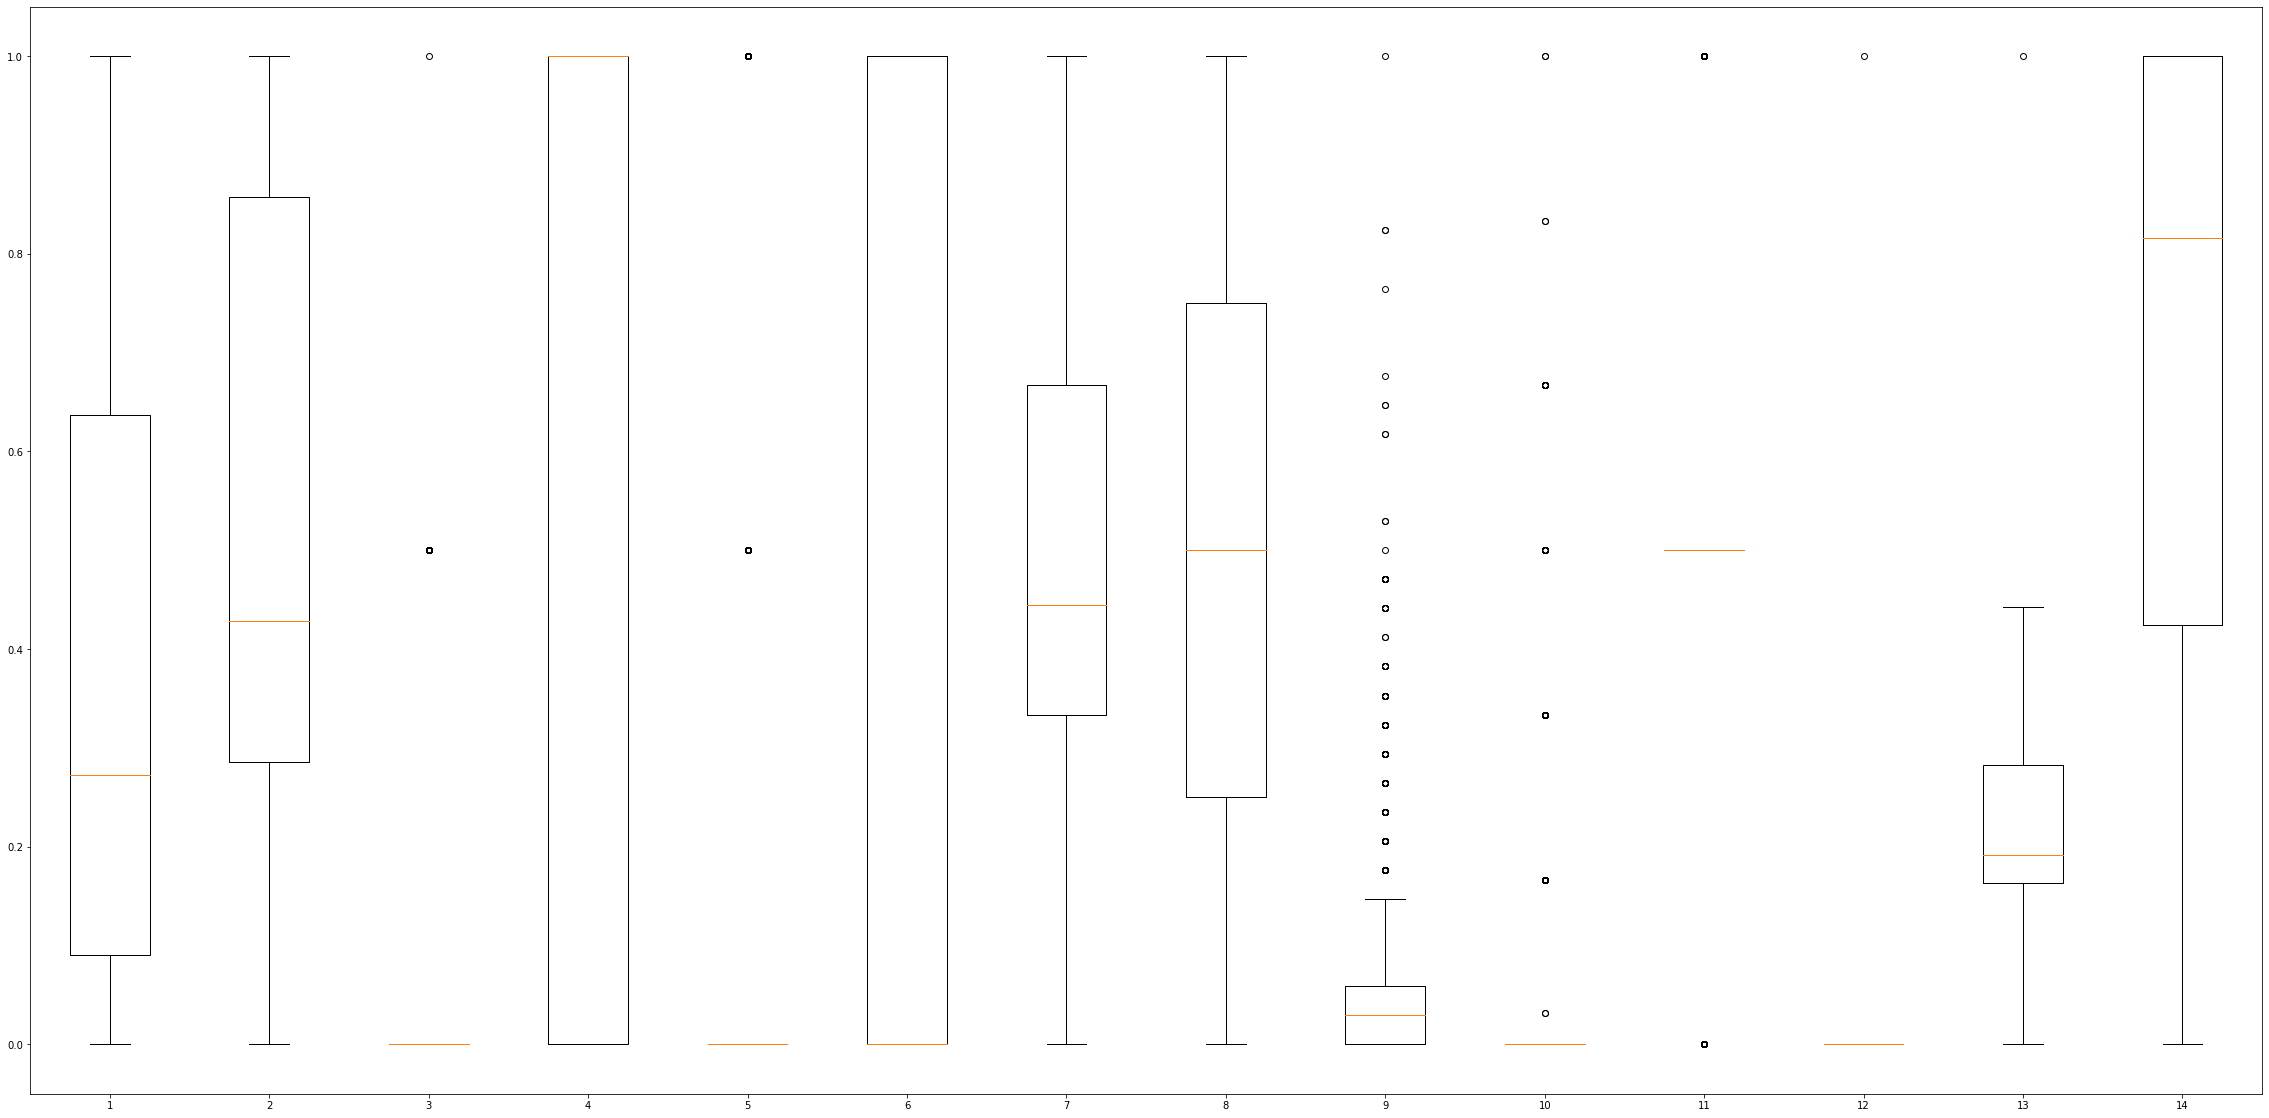

In [442]:
plt.boxplot(df_norm)
plt.show()

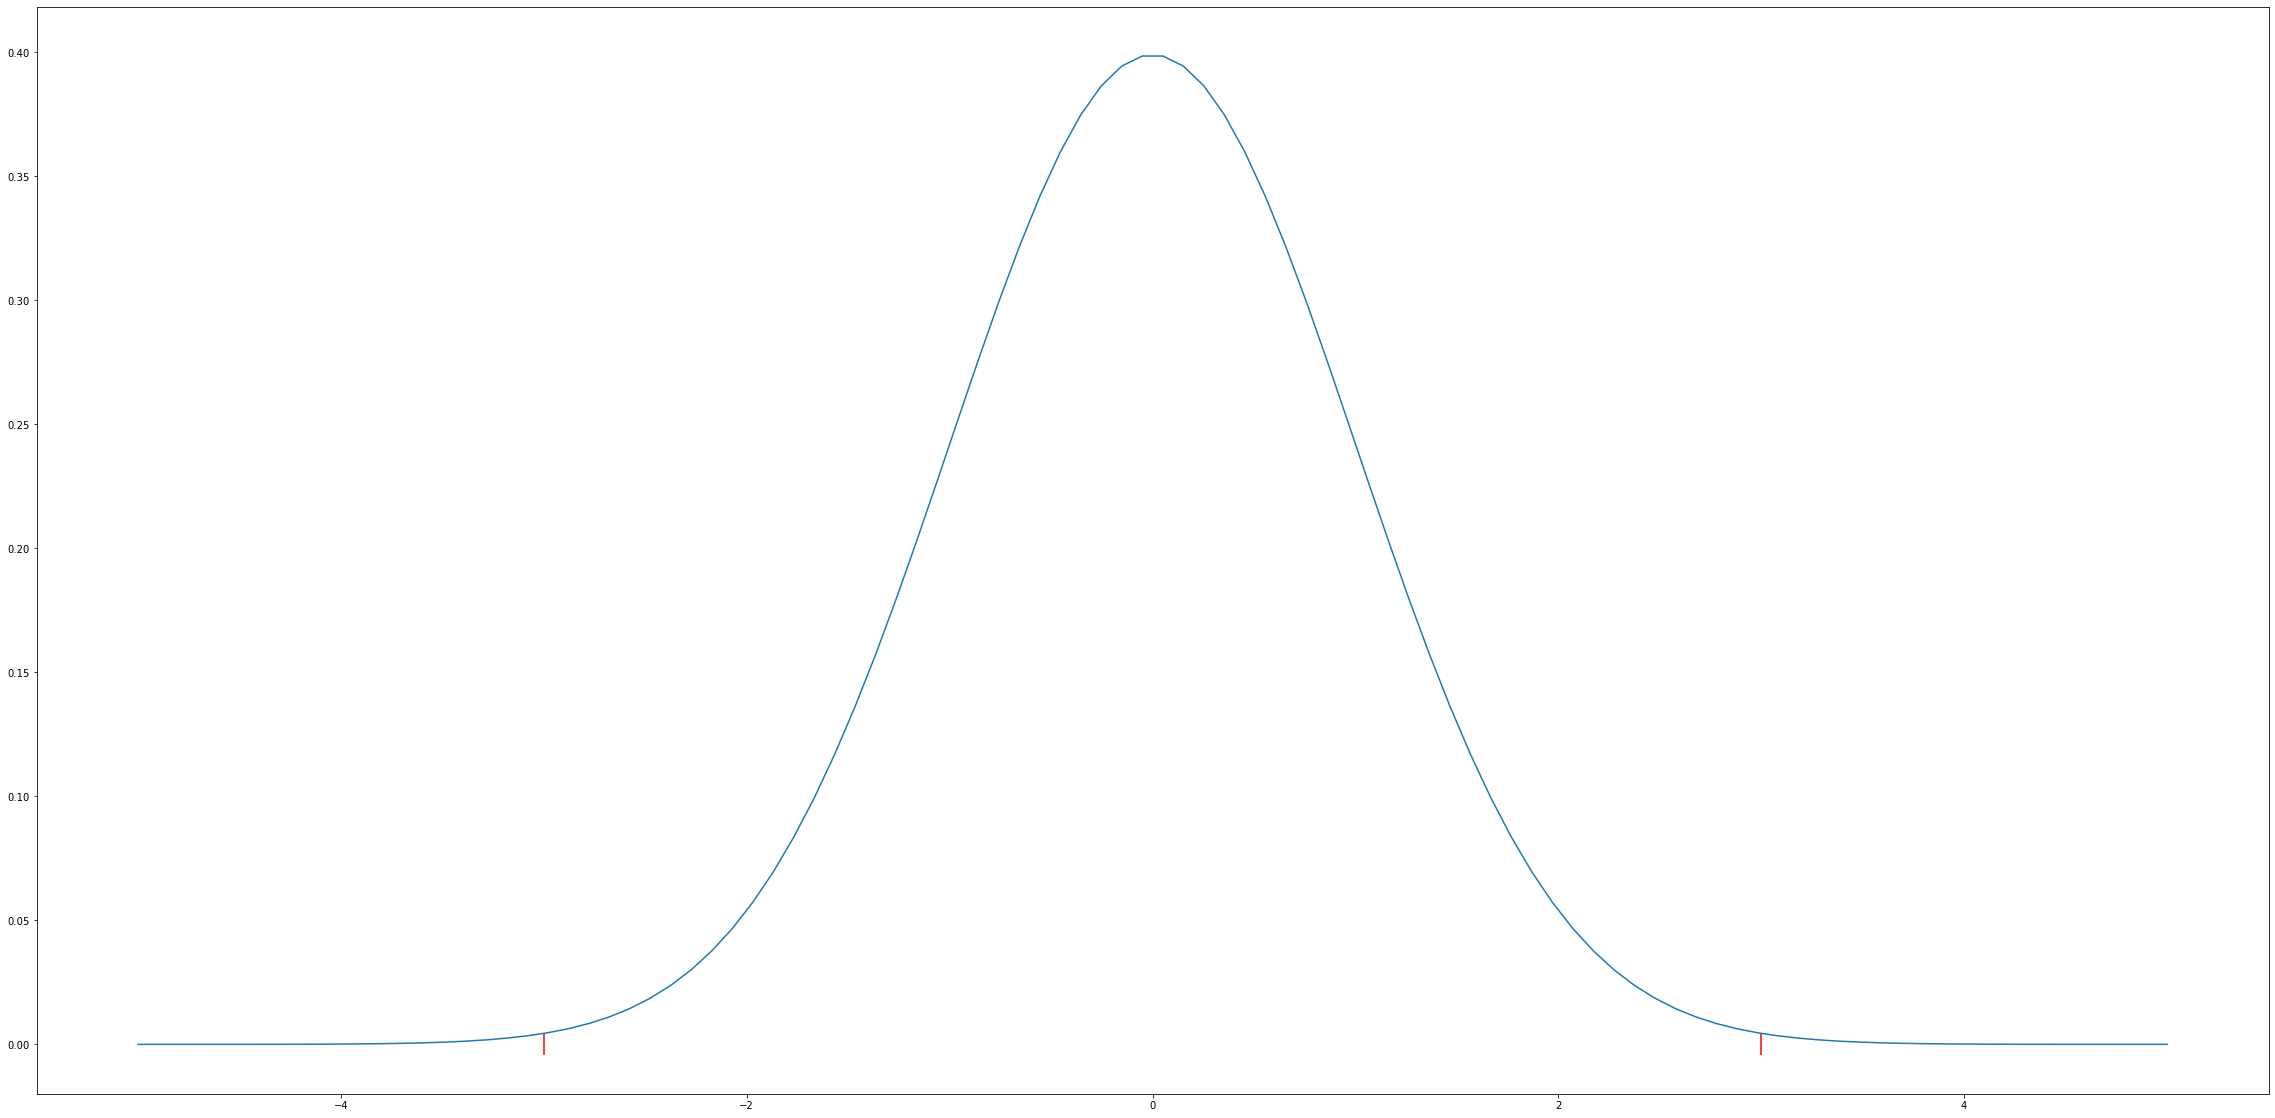

In [443]:
import math
import scipy.stats as stats

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.scatter([3*sigma,-3*sigma], [0,0], c = 'r', marker = '|', s = 500)
plt.show()

In [444]:
!pip install pydataset

In [445]:
from pydataset import data
from scipy import stats
import numpy as np
z1 = np.abs(stats.zscore(df_norm))
z1

array([[7.83430598e-01, 8.28299502e-01, 4.92098653e-01, ...,
        4.46578759e-02, 1.36221163e+00, 9.47933988e-01],
       [8.80517820e-01, 3.63037583e-01, 4.92098653e-01, ...,
        5.02838281e-05, 9.57951766e-01, 3.04745821e-01],
       [8.80517820e-01, 3.63037583e-01, 4.92098653e-01, ...,
        1.29726342e-03, 9.11341311e-02, 8.92738385e-01],
       ...,
       [1.15784256e+00, 3.63037583e-01, 4.92098653e-01, ...,
        4.41415261e-02, 1.36221163e+00, 9.47933988e-01],
       [1.06075533e+00, 3.63037583e-01, 4.92098653e-01, ...,
        1.34763902e-03, 9.04741891e-01, 8.92738385e-01],
       [4.85436113e-02, 3.63037583e-01, 4.92098653e-01, ...,
        9.30679998e-03, 4.02943999e-01, 2.53616033e-01]])

In [446]:
a1 = np.where(z1>3)
a2=a1[0]
a2 = np.delete(a2, [43])
a2

array([   5,   21,   39,   50,   56,   60,   79,  140,  150,  153,  161,
        163,  192,  203,  282,  292,  327,  340,  420,  425,  447,  448,
        465,  484,  499,  517,  526,  589,  605,  609,  658,  672,  688,
        695,  696,  713,  735,  745,  750,  754,  766,  772,  780,  784,
        794,  797,  836,  886,  911,  947,  955,  965,  971, 1033, 1046,
       1053, 1062, 1080, 1096, 1116, 1189, 1190, 1216, 1219, 1260, 1265,
       1272, 1290, 1298, 1303, 1305, 1308, 1328, 1332, 1357, 1381, 1386,
       1445, 1457, 1488, 1505, 1576, 1591, 1602, 1628, 1648, 1658, 1660,
       1661, 1665, 1713, 1745, 1750, 1752, 1793, 1800, 1803, 1828, 1837,
       1840, 1846, 1880, 1932, 1958, 1972, 1999, 2003, 2004, 2018, 2084,
       2091, 2108, 2122, 2139, 2142, 2162, 2187, 2202, 2203, 2211, 2213,
       2251, 2285, 2301, 2344, 2368, 2407, 2427, 2428, 2431, 2433, 2480,
       2484, 2485, 2488, 2524, 2552, 2593, 2616, 2636, 2661, 2709, 2716,
       2801, 2850, 2862, 2874, 2891, 2902, 2946, 29

In [447]:
from random import randint
df_no_outliers = df_norm

brojac=0
while (brojac<len(a2)): 
    num=a2[brojac]
    df_no_outliers = df_no_outliers.drop(num)
    brojac+=1

In [448]:
df_no_outliers

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.282582,1.000


In [449]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 3909 non-null   float64
 1   education           3909 non-null   float64
 2   default             3909 non-null   float64
 3   housing             3909 non-null   float64
 4   loan                3909 non-null   float64
 5   contact             3909 non-null   float64
 6   month               3909 non-null   float64
 7   day_of_week         3909 non-null   float64
 8   campaign            3909 non-null   float64
 9   previous            3909 non-null   float64
 10  poutcome            3909 non-null   float64
 11  euribor3m           3909 non-null   float64
 12  MonthlyIndicator    3909 non-null   float64
 13  QuarterlyIndicator  3909 non-null   float64
dtypes: float64(14)
memory usage: 458.1 KB


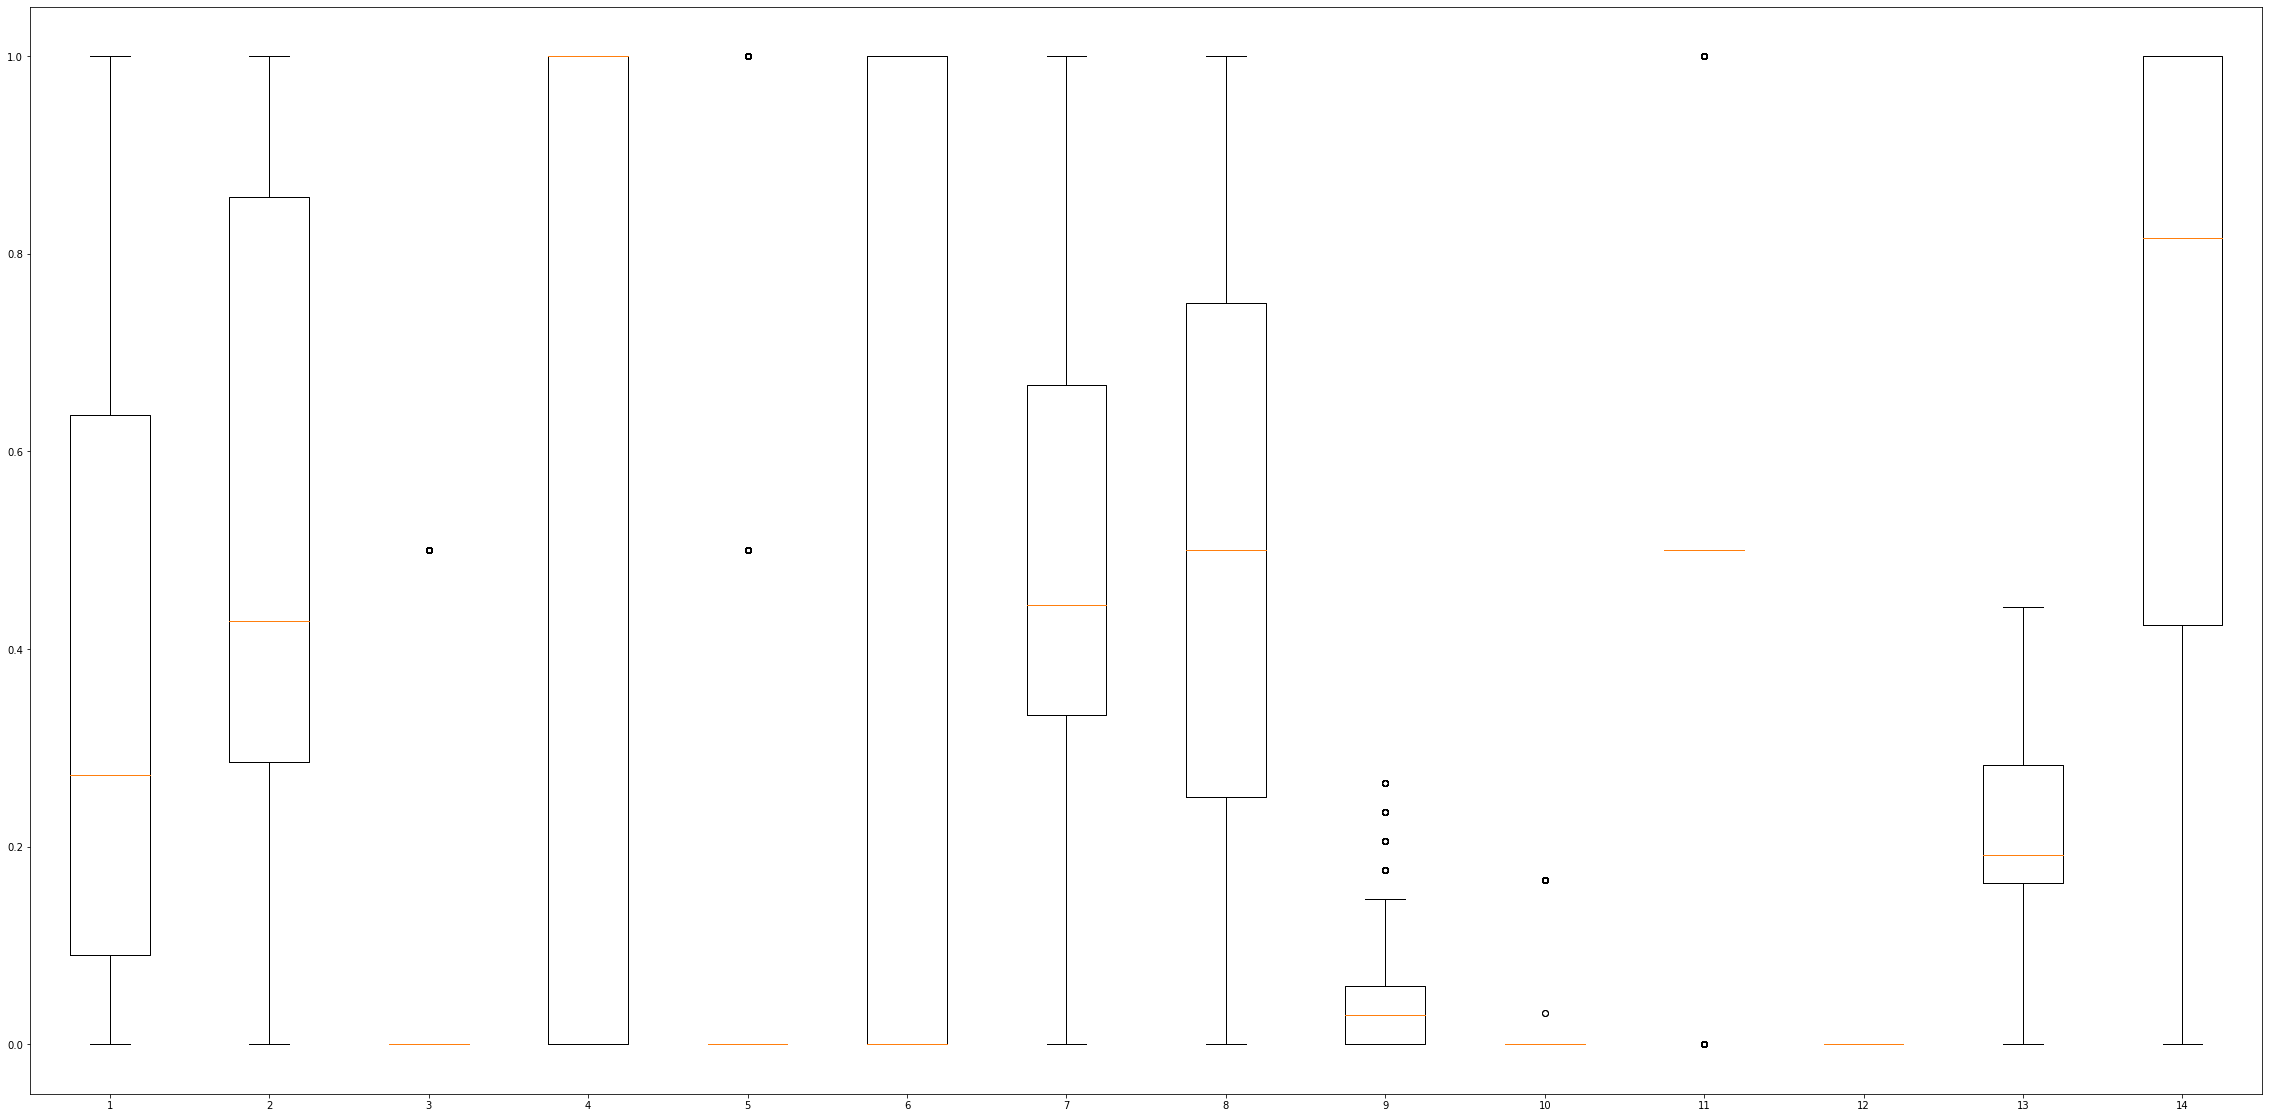

In [450]:
plt.boxplot(df_no_outliers)
plt.show()

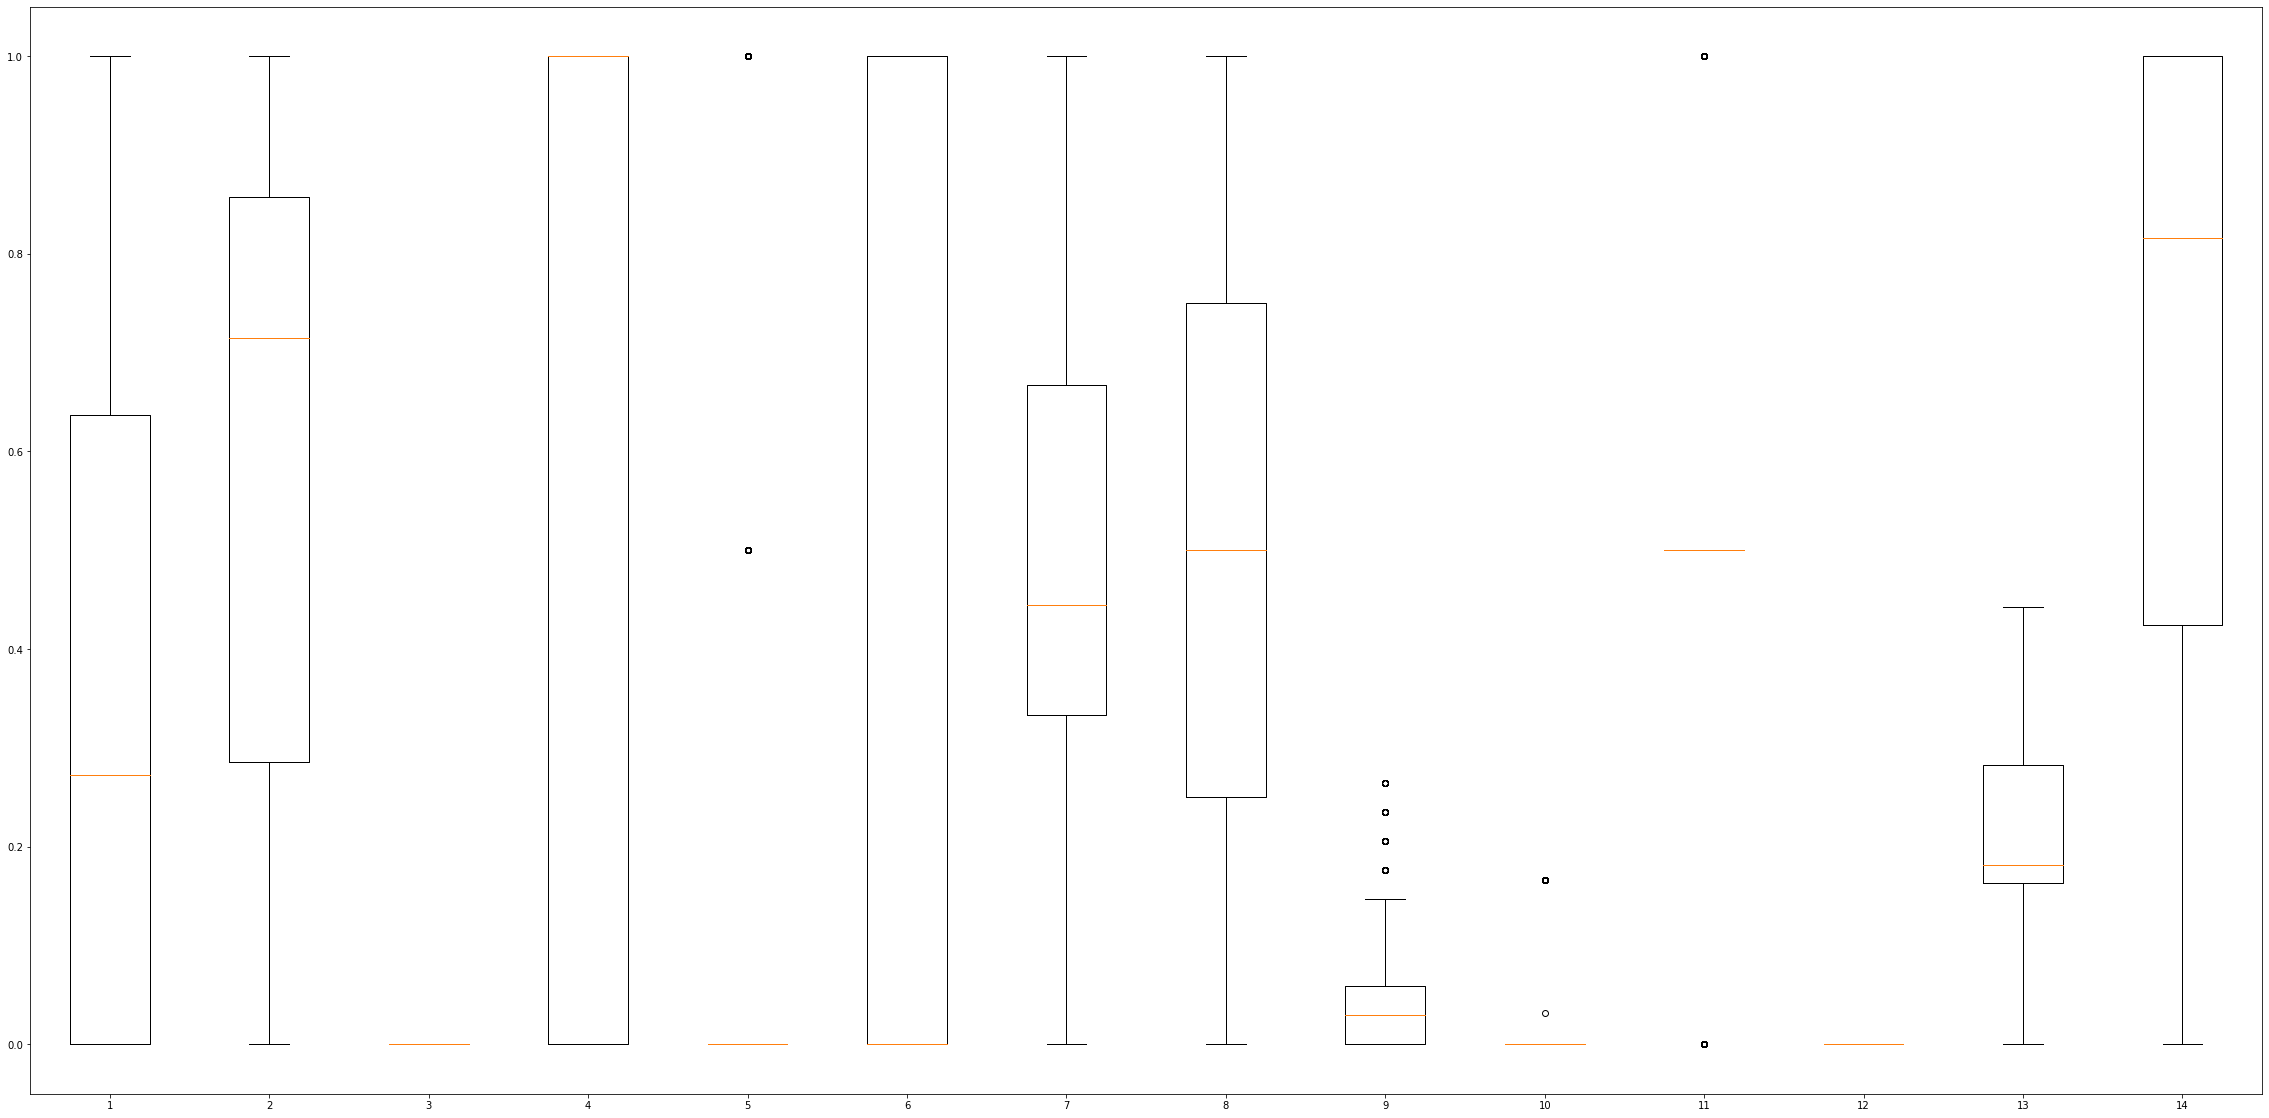

In [451]:
df_no_outliers5 = df_no_outliers.loc[(df_no_outliers['default']<0.5)]
plt.boxplot(df_no_outliers5)
plt.show()

In [452]:
df_no_outliers5

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.282582,1.000


### 9) Create a cluster model and specify the clusters of each instance

In [453]:
df_no_outliers

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.282582,1.000


In [454]:
from sklearn.cluster import KMeans
kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)

In [455]:
cluster_model = kmeans_algorithm.fit(df_no_outliers)
# Odredjivanje pocetnih centroida
centers = cluster_model.cluster_centers_
print(centers)

[[ 3.41603670e-01  4.89694385e-01  1.37882018e-01  4.93248045e-01
   1.79104478e-01  1.00000000e+00  5.67953881e-01  5.01066098e-01
   4.15806909e-02  3.31674959e-03  4.95024876e-01  7.66434395e-04
   2.39281798e-01  8.33153359e-01]
 [ 3.51431268e-01  5.78250124e-01  7.92387543e-02  9.81314879e-01
   2.02076125e-01 -1.11022302e-15  4.23221838e-01  5.14878893e-01
   3.57120756e-02  2.88570277e-02  4.47404844e-01  4.99594292e-04
   1.74422469e-01  6.79151246e-01]
 [ 3.44112841e-01  5.44668198e-01  7.71050142e-02  4.73036897e-04
   1.35761589e-01 -9.99200722e-16  4.25522969e-01  4.92904447e-01
   3.53108131e-02  3.09351041e-02  4.40397351e-01  5.04978263e-04
   1.76882783e-01  6.79046358e-01]]


In [456]:
clusters = cluster_model.predict(df_no_outliers)
df_no_outliers['Cluster'] = clusters
df_no_outliers.head()

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator,Cluster
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.0,0.5,0.000133,0.075025,0.424,1
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.0,0.5,0.000828,0.287454,0.816,0
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.0,0.5,0.000849,0.191402,1.000,0
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.0,0.5,0.000848,0.191402,1.000,0
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.0,0.5,0.000697,0.162854,0.800,1


In [457]:
# Prikazivanje centroida
centroidi = pd.DataFrame(centers, columns = ['job','education', 'default','housing', 'loan', 'contact','month',
'day_of_week', 'campaign','previous', 'poutcome','euribor3m','MonthlyIndicator','QuarterlyIndicator'])
centroidi

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.341604,0.489694,0.137882,0.493248,0.179104,1.000000e+00,0.567954,0.501066,0.041581,0.003317,0.495025,0.000766,0.239282,0.833153
1,0.351431,0.578250,0.079239,0.981315,0.202076,-1.110223e-15,0.423222,0.514879,0.035712,0.028857,0.447405,0.000500,0.174422,0.679151
2,0.344113,0.544668,0.077105,0.000473,0.135762,-9.992007e-16,0.425523,0.492904,0.035311,0.030935,0.440397,0.000505,0.176883,0.679046


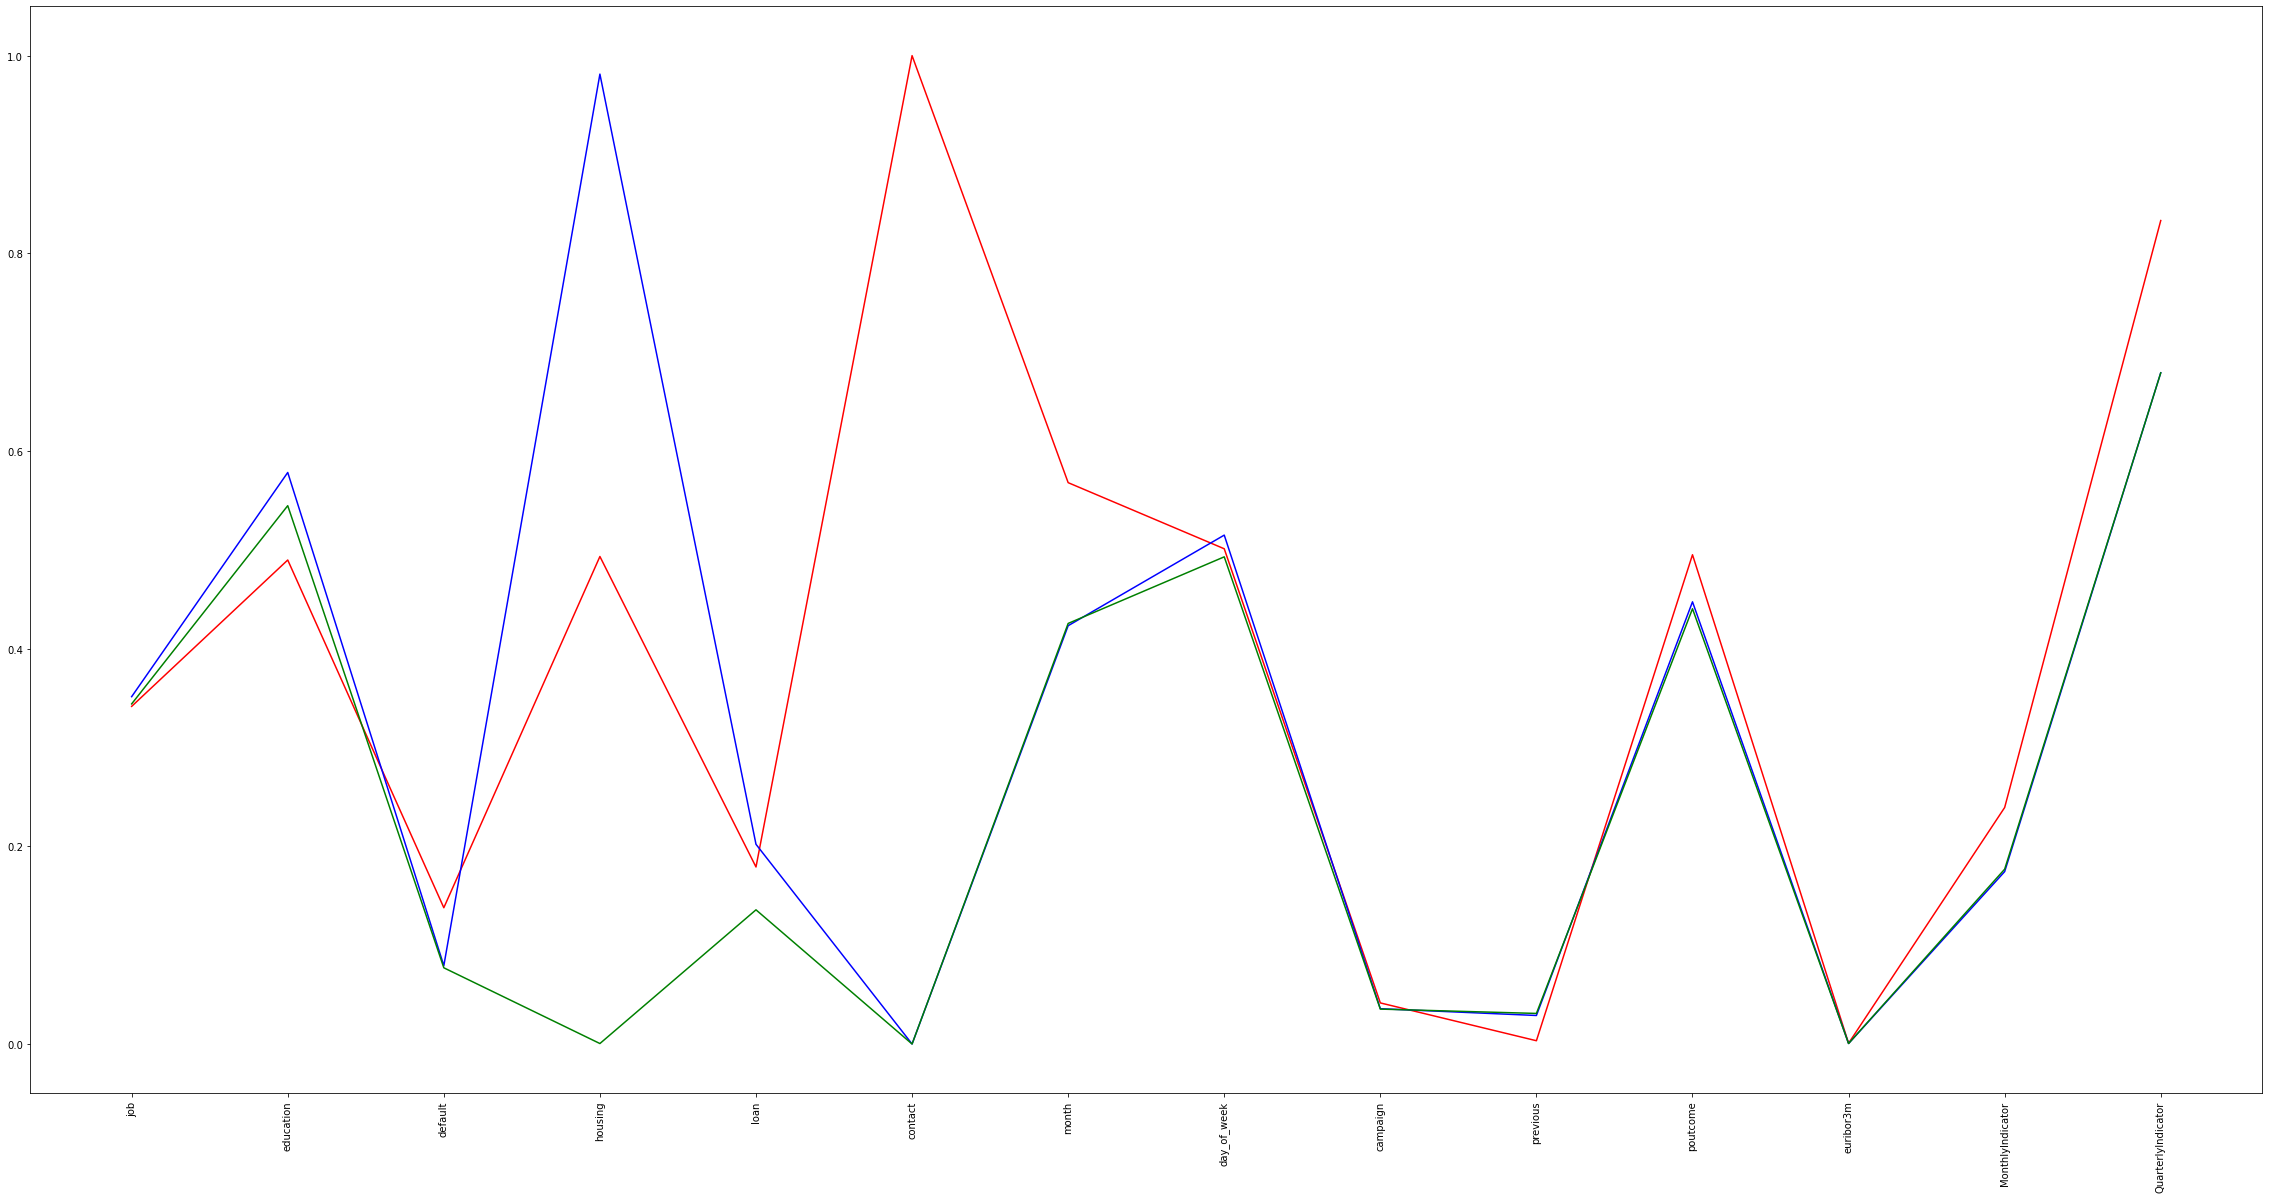

In [458]:
plt.close()
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.plot(centers[2,:], c = 'g')
plt.rcParams['figure.figsize']=[40,20]
plt.xticks(list(range(14)), list(df_no_outliers.columns[:-1]), rotation = 'vertical')
plt.show()

In [459]:
# Kreiranje modela za broj klastera k = 1..10
df_no_outliers1_2 = df_no_outliers.drop('Cluster', axis = 1)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_no_outliers1_2)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_

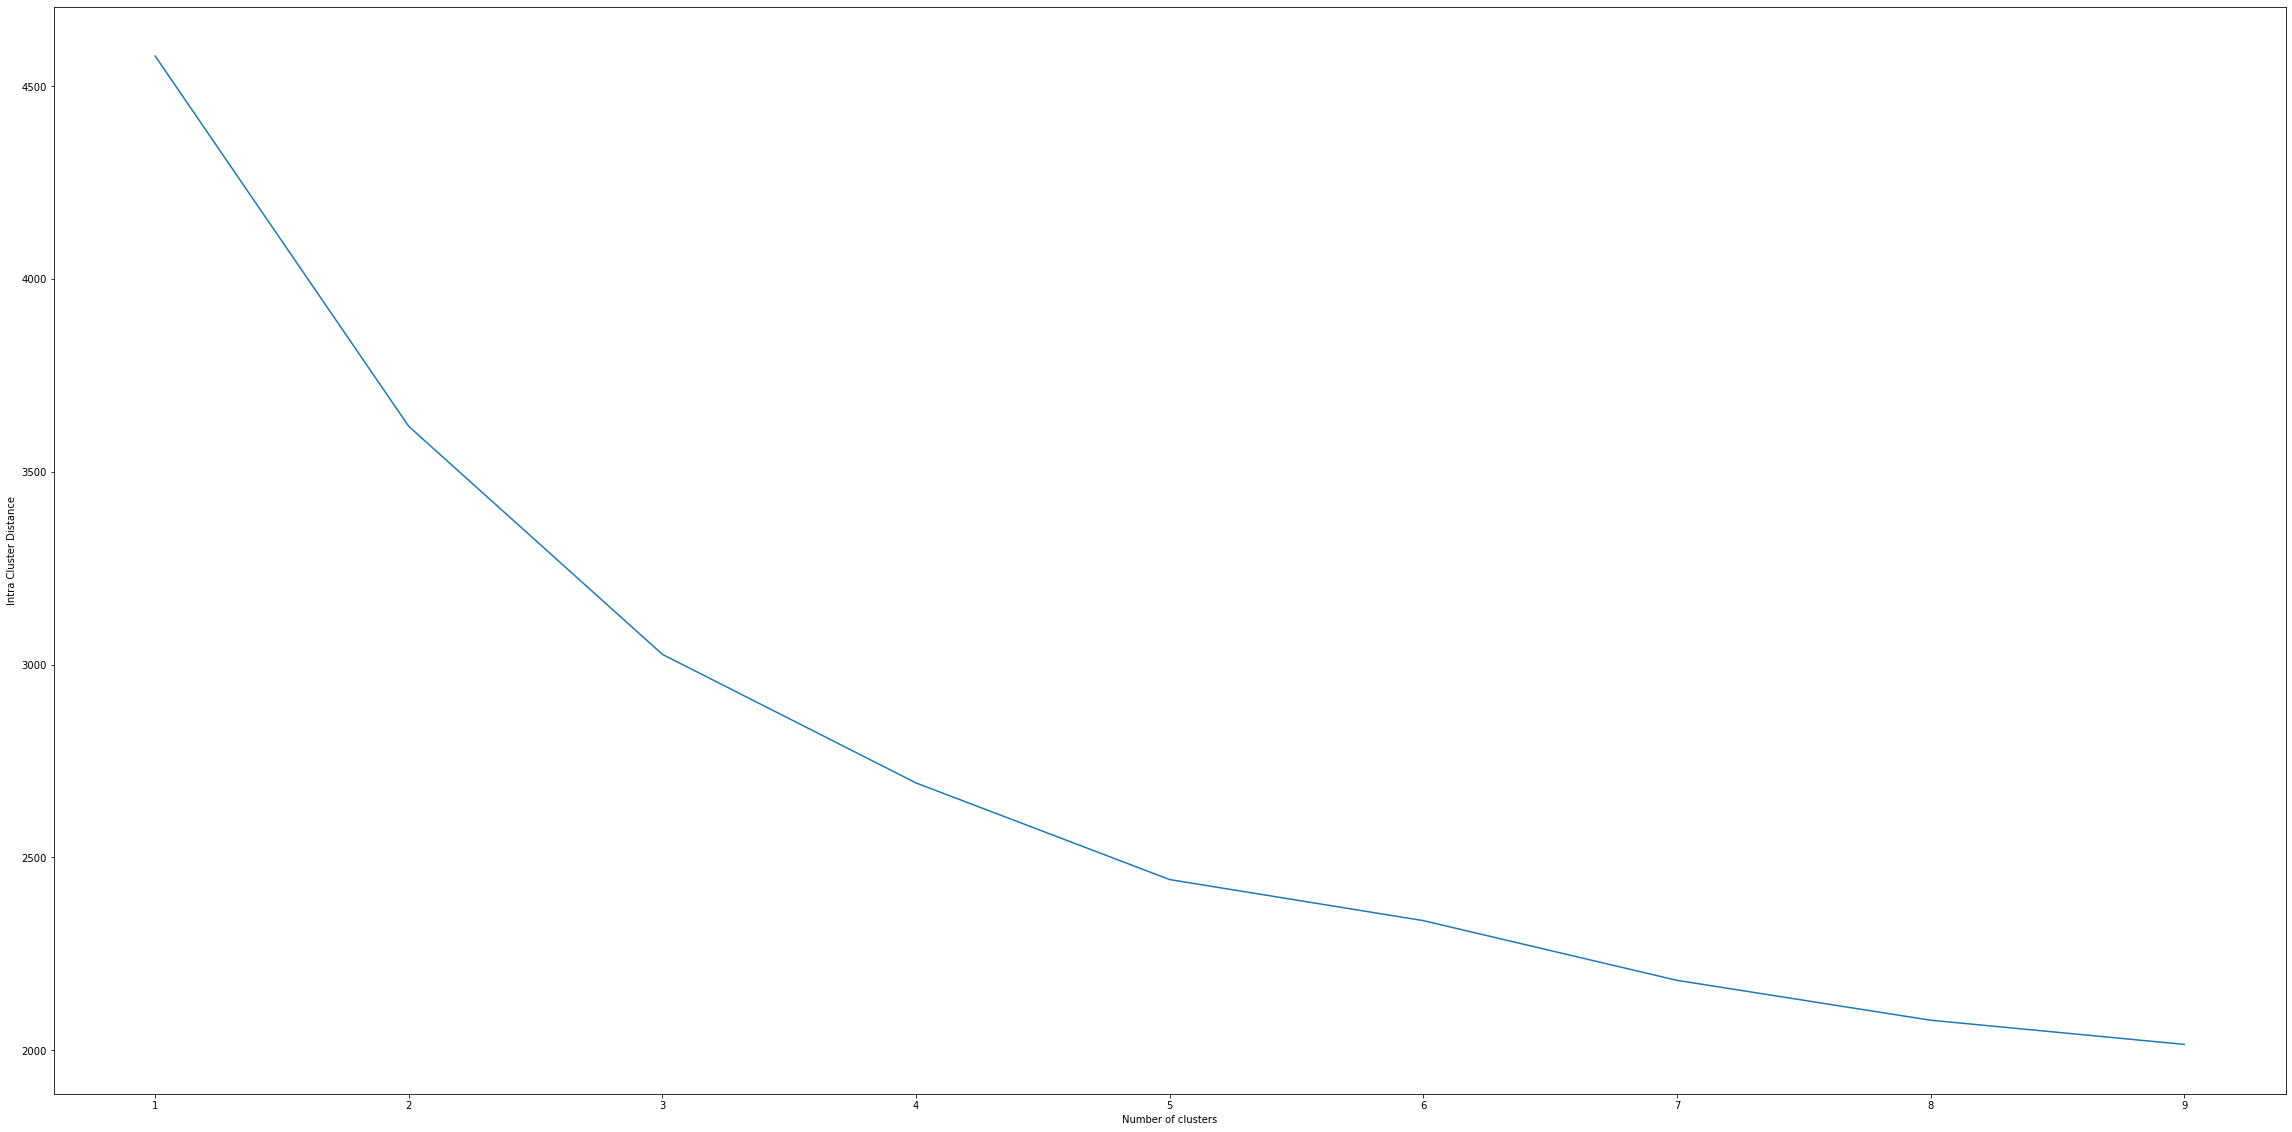

In [460]:
#Elbow kriva
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

In [461]:
from sklearn.metrics import silhouette_score

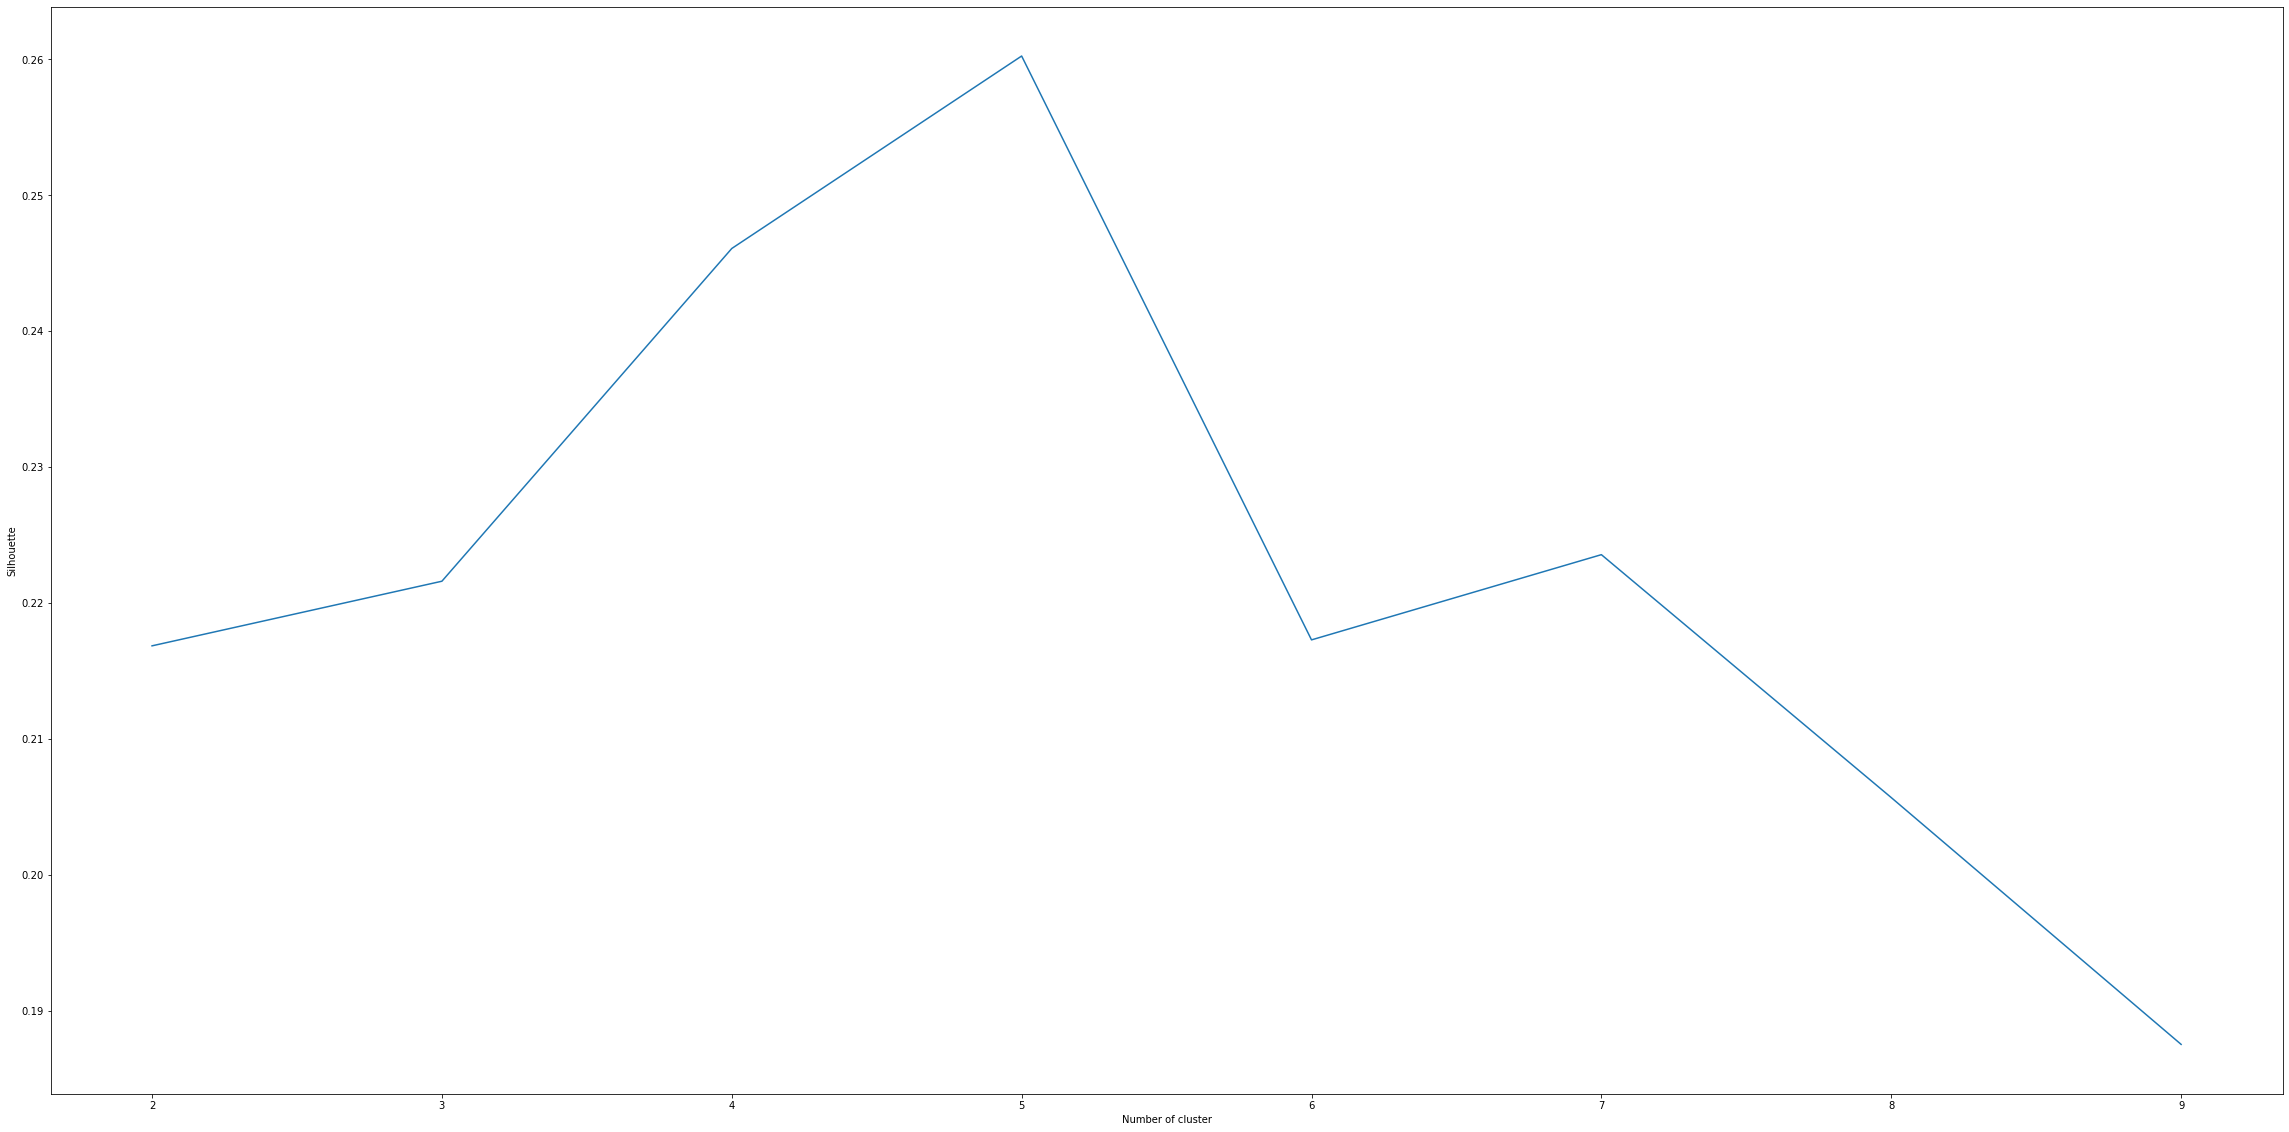

In [462]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_no_outliers1_2)
    cluster_labels = kmeans.fit_predict(df_no_outliers1_2)
    sse[k] = silhouette_score(df_no_outliers1_2, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

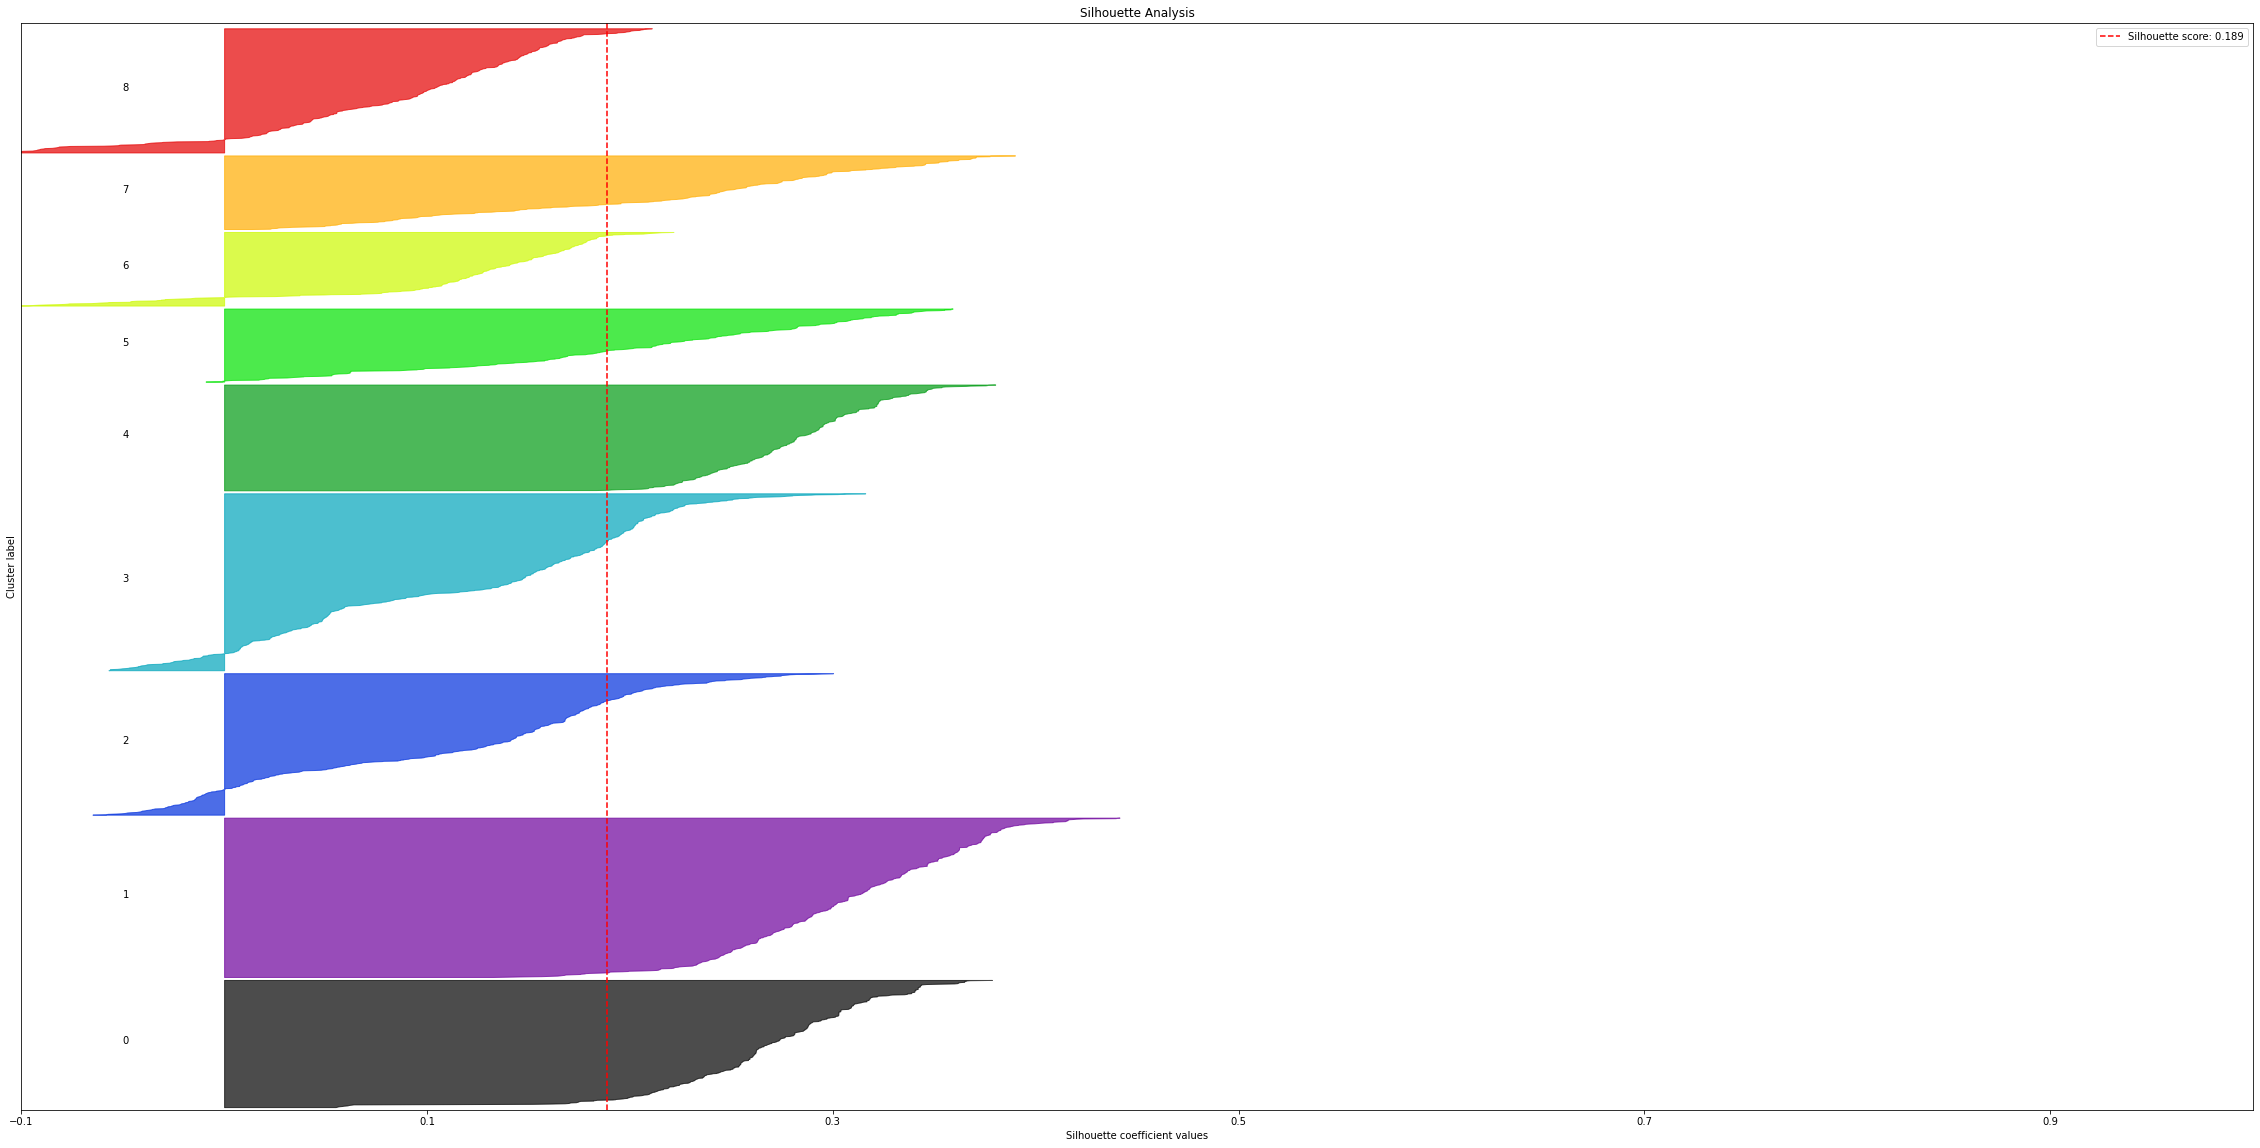

In [463]:
!pip install scikit-plot
import scikitplot as skplt
cluster_labels = KMeans(n_clusters=k, max_iter=100).fit_predict(df_no_outliers1_2)
skplt.metrics.plot_silhouette(df_no_outliers1_2, cluster_labels)
plt.show()

In [464]:
kmeans_algorithm2 = KMeans(n_clusters = 5, max_iter = 100)
cluster_model2 = kmeans_algorithm2.fit(df_no_outliers1_2)
centers2 = cluster_model2.cluster_centers_
print(centers2)

[[ 3.40877305e-01  4.71928072e-01  1.38461538e-01  9.70629371e-01
   2.09790210e-01  1.00000000e+00  5.57731158e-01  4.96503497e-01
   4.24133503e-02  4.42890443e-03  4.93706294e-01  7.55420838e-04
   2.35520649e-01  8.28574511e-01]
 [ 3.65599843e-01  5.63714903e-01  7.23542117e-02  6.31749460e-01
   9.40604752e-01  1.11022302e-16  4.12047036e-01  5.08099352e-01
   3.78944399e-02  2.73578114e-02  4.46004320e-01  5.17109013e-04
   1.78055228e-01  6.97382289e-01]
 [ 3.44744066e-01  5.78913981e-01  8.03730018e-02  1.00000000e+00
  -4.16333634e-16 -1.11022302e-15  4.25300967e-01  5.11323268e-01
   3.47403615e-02  3.05196018e-02  4.44937833e-01  4.96720394e-04
   1.74192390e-01  6.75152354e-01]
 [ 3.44020711e-01  5.45923956e-01  7.88608981e-02  7.77156117e-16
  -1.94289029e-16 -6.66133815e-16  4.28988682e-01  4.97261774e-01
   3.53392178e-02  2.99726962e-02  4.43044907e-01  5.00489748e-04
   1.75712342e-01  6.74716320e-01]
 [ 3.42354178e-01  5.08051197e-01  1.37283237e-01  4.44089210e-16
  

In [465]:
clusters2 = cluster_model2.predict(df_no_outliers1_2)
df_no_outliers1_2['Cluster2'] = clusters2
df_no_outliers1_2.head()

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator,Cluster2
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.0,0.5,0.000133,0.075025,0.424,2
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.0,0.5,0.000828,0.287454,0.816,4
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.0,0.5,0.000849,0.191402,1.000,0
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.0,0.5,0.000848,0.191402,1.000,0
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.0,0.5,0.000697,0.162854,0.800,2


In [466]:
centroidi2 = pd.DataFrame(centers2, columns = ['job','education', 'default','housing', 'loan', 'contact','month',
'day_of_week', 'campaign','previous', 'poutcome','euribor3m','MonthlyIndicator','QuarterlyIndicator'])
centroidi2

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.340877,0.471928,0.138462,9.706294e-01,2.097902e-01,1.000000e+00,0.557731,0.496503,0.042413,0.004429,0.493706,0.000755,0.235521,0.828575
1,0.365600,0.563715,0.072354,6.317495e-01,9.406048e-01,1.110223e-16,0.412047,0.508099,0.037894,0.027358,0.446004,0.000517,0.178055,0.697382
2,0.344744,0.578914,0.080373,1.000000e+00,-4.163336e-16,-1.110223e-15,0.425301,0.511323,0.034740,0.030520,0.444938,0.000497,0.174192,0.675152
3,0.344021,0.545924,0.078861,7.771561e-16,-1.942890e-16,-6.661338e-16,0.428989,0.497262,0.035339,0.029973,0.443045,0.000500,0.175712,0.674716
4,0.342354,0.508051,0.137283,4.440892e-16,1.473988e-01,1.000000e+00,0.578516,0.505780,0.040720,0.002168,0.496387,0.000778,0.243168,0.837884


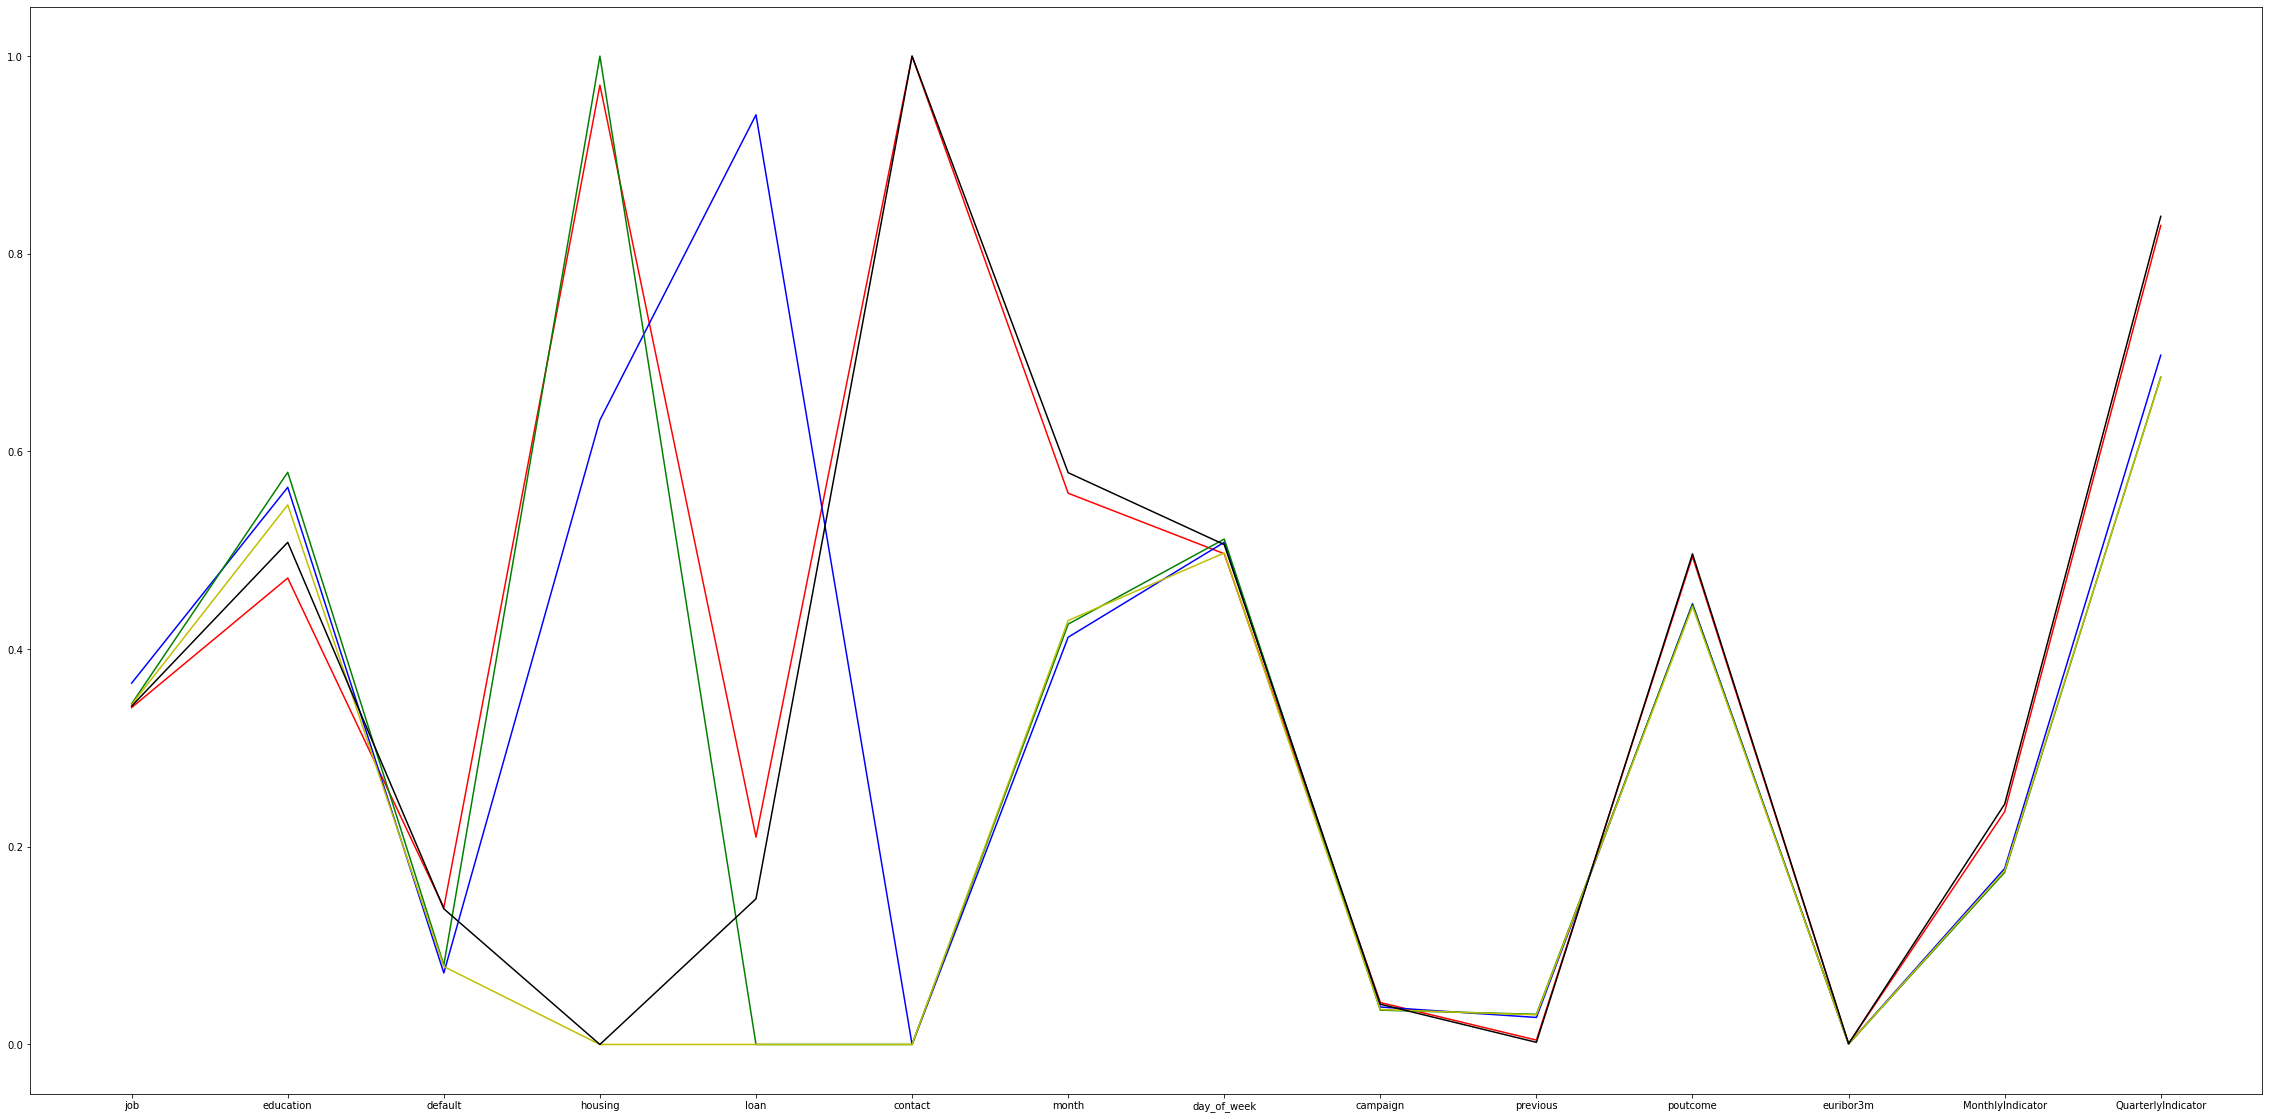

In [467]:
plt.close()
plt.plot(centers2[0,:], c = 'r')
plt.plot(centers2[1,:], c = 'b')
plt.plot(centers2[2,:], c = 'g')
plt.plot(centers2[3,:], c = 'y')
plt.plot(centers2[4,:], c = 'k')
plt.rcParams['figure.figsize']=[40,20]
plt.xticks(list(range(14)), list(df_no_outliers1_2.columns[:-1]), )
plt.show()

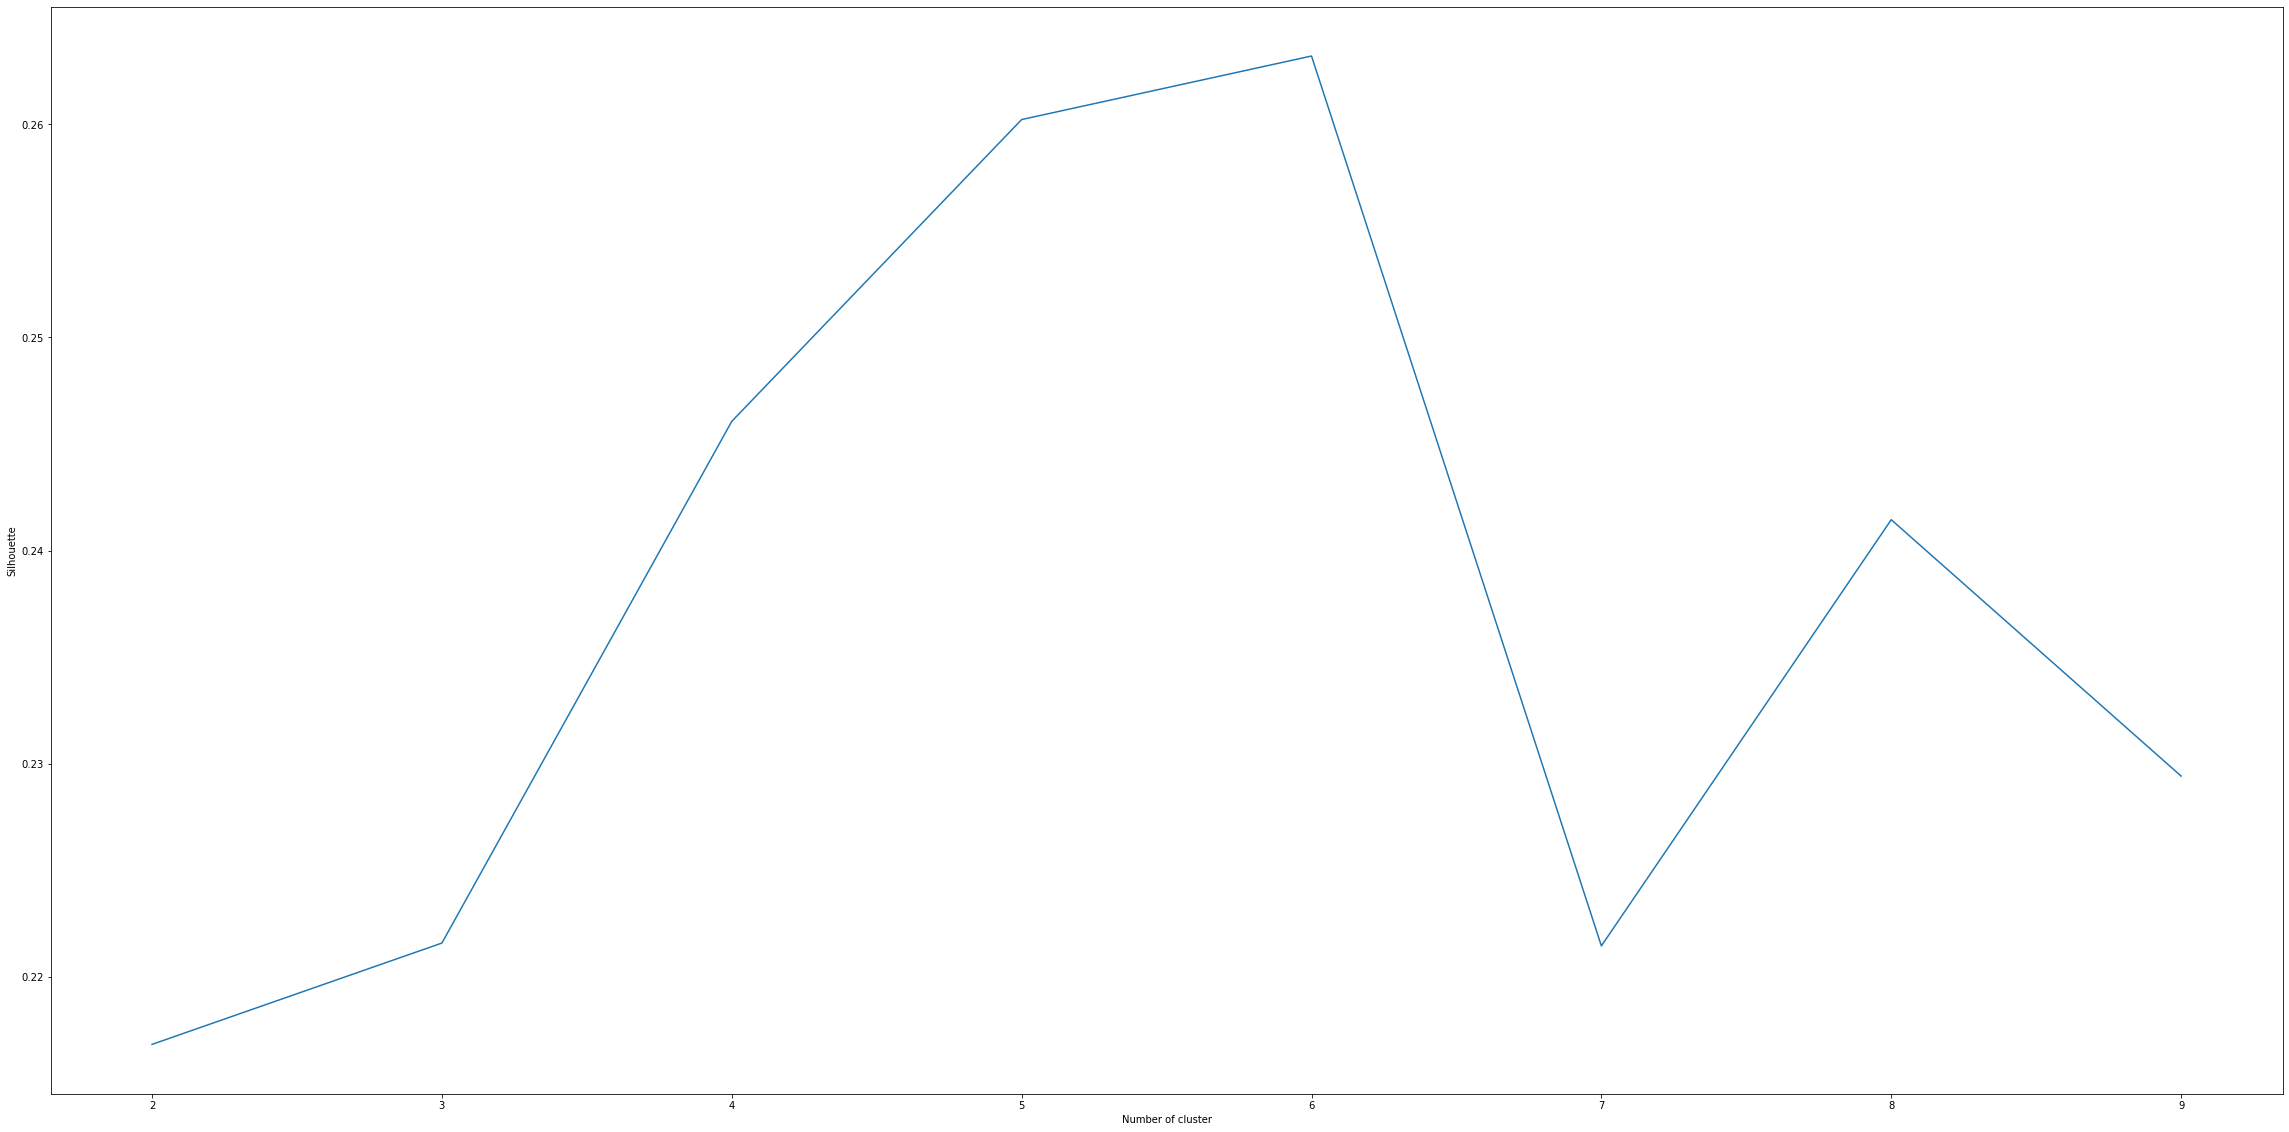

In [468]:
df_no_outliers3 = df_no_outliers1_2.drop('Cluster2', axis = 1)
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_no_outliers3)
    cluster_labels = kmeans.fit_predict(df_no_outliers3)
    sse[k] = silhouette_score(df_no_outliers3, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

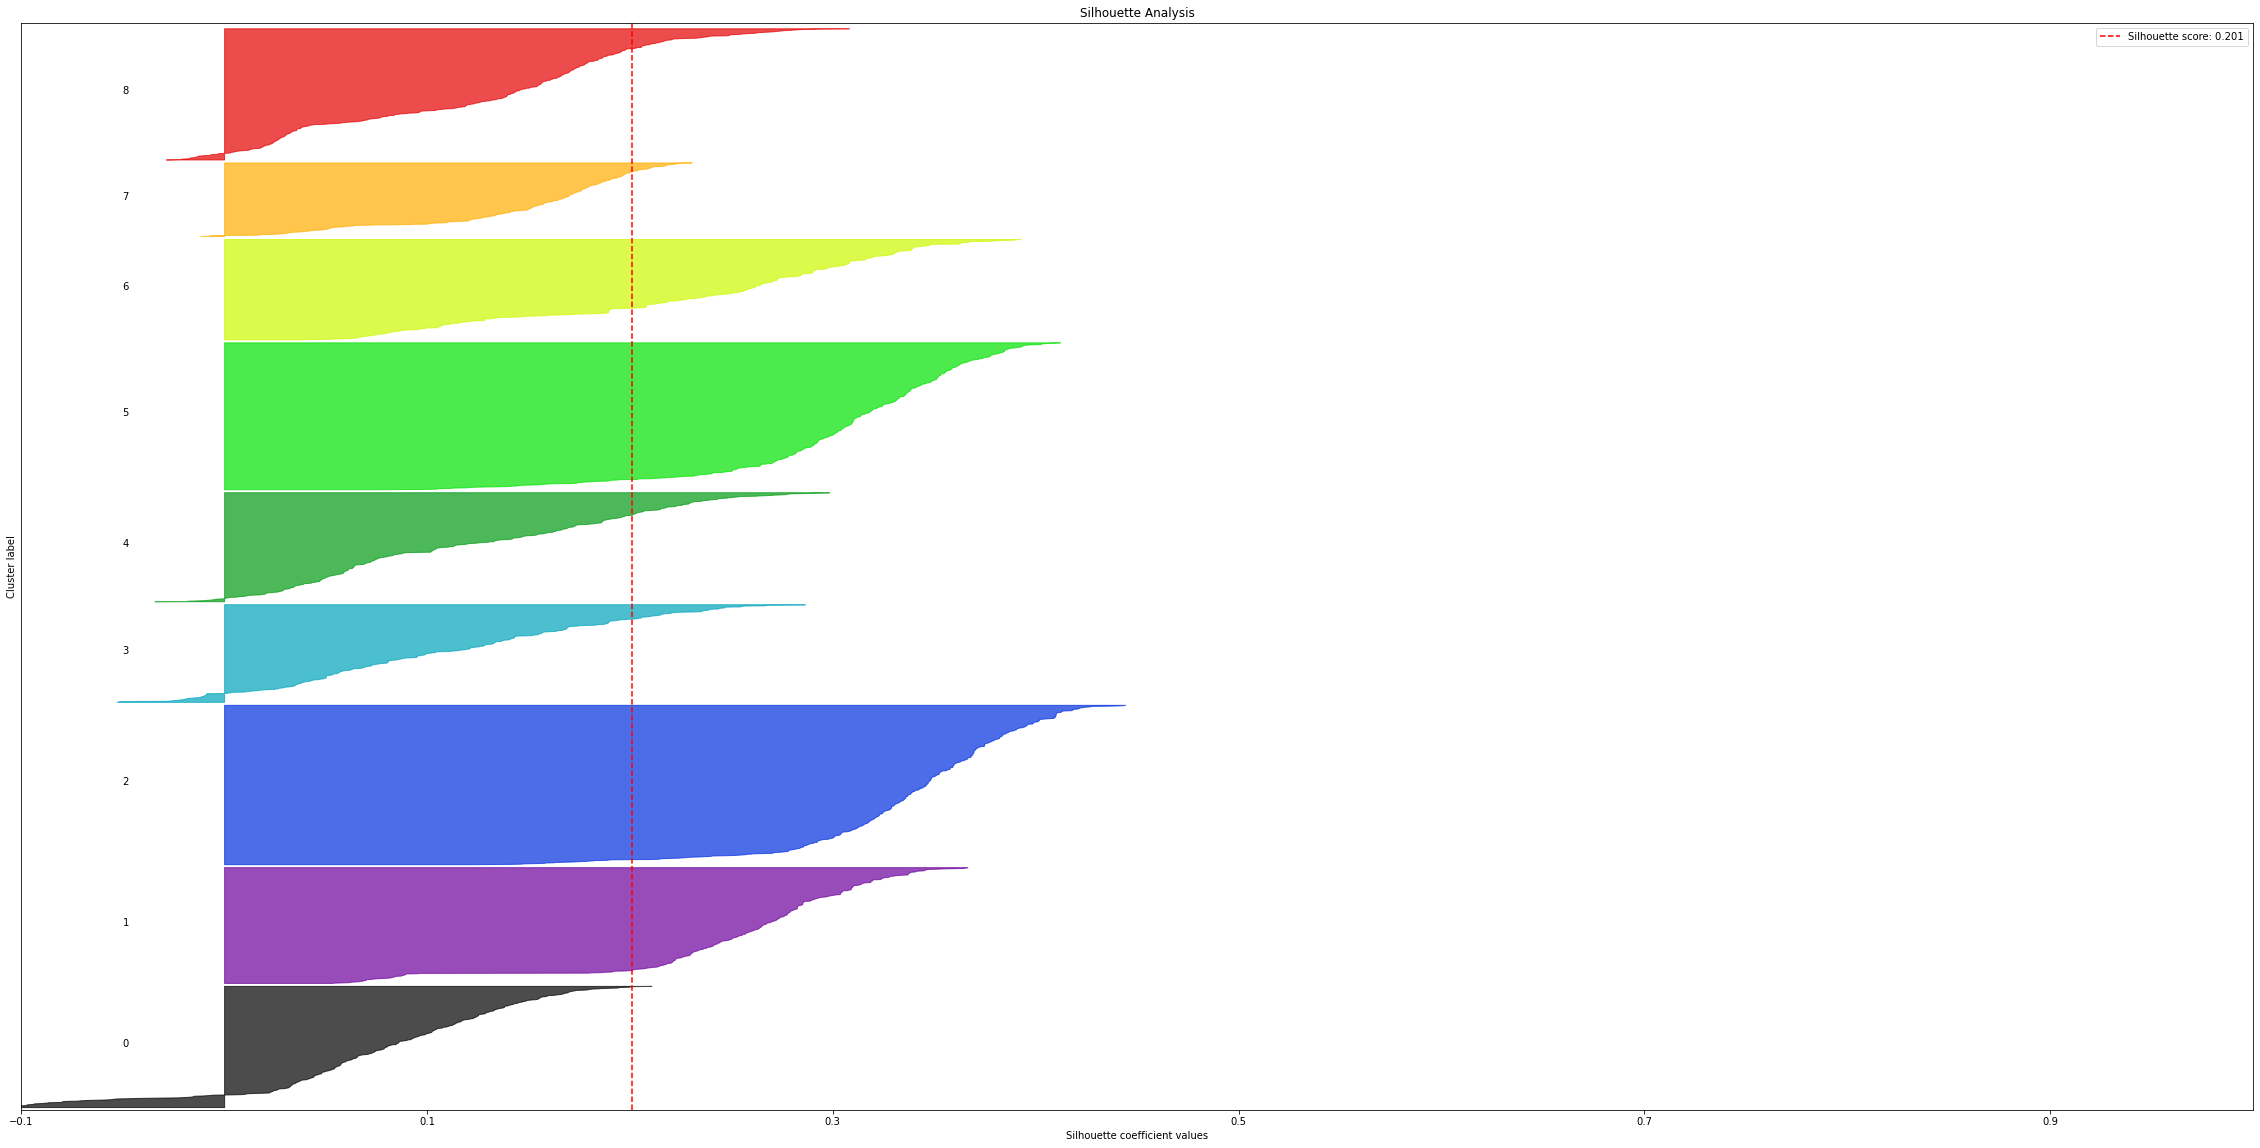

In [469]:
cluster_labels2 = KMeans(n_clusters=k, max_iter=100).fit_predict(df_no_outliers3)
skplt.metrics.plot_silhouette(df_no_outliers3, cluster_labels2)
plt.show()

In [470]:
kmeans_algorithm3 = KMeans(n_clusters = 4, max_iter = 100)
cluster_model3 = kmeans_algorithm3.fit(df_no_outliers3)
centers3 = cluster_model3.cluster_centers_
print(centers3)

[[ 3.42354178e-01  5.08051197e-01  1.37283237e-01  3.33066907e-16
   1.47398844e-01  1.00000000e+00  5.78516378e-01  5.05780347e-01
   4.07203564e-02  2.16763006e-03  4.96387283e-01  7.77814009e-04
   2.43167956e-01  8.37884393e-01]
 [ 3.43873518e-01  5.44153389e-01  7.70321361e-02  9.45179584e-04
   1.36105860e-01 -9.43689571e-16  4.25435833e-01  4.92674858e-01
   3.53330368e-02  3.09058648e-02  4.40453686e-01  5.05302759e-04
   1.76869855e-01  6.79349716e-01]
 [ 3.51611685e-01  5.78650574e-01  7.92936288e-02  9.81648199e-01
   2.01869806e-01 -1.11022302e-15  4.23284087e-01  5.15062327e-01
   3.56960704e-02  2.88770118e-02  4.47368421e-01  4.99352810e-04
   1.74430238e-01  6.78929052e-01]
 [ 3.40877305e-01  4.71928072e-01  1.38461538e-01  9.70629371e-01
   2.09790210e-01  1.00000000e+00  5.57731158e-01  4.96503497e-01
   4.24133503e-02  4.42890443e-03  4.93706294e-01  7.55420838e-04
   2.35520649e-01  8.28574511e-01]]


In [471]:
clusters3 = cluster_model3.predict(df_no_outliers3)
df_no_outliers3['Cluster3'] = clusters3
df_no_outliers3.head()

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator,Cluster3
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.0,0.5,0.000133,0.075025,0.424,2
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.0,0.5,0.000828,0.287454,0.816,0
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.0,0.5,0.000849,0.191402,1.000,3
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.0,0.5,0.000848,0.191402,1.000,3
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.0,0.5,0.000697,0.162854,0.800,2


In [472]:
centroidi3 = pd.DataFrame(centers3, columns = ['job','education', 'default','housing', 'loan', 'contact','month',
'day_of_week', 'campaign','previous', 'poutcome','euribor3m','MonthlyIndicator','QuarterlyIndicator'])
centroidi3

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.342354,0.508051,0.137283,3.330669e-16,0.147399,1.000000e+00,0.578516,0.505780,0.040720,0.002168,0.496387,0.000778,0.243168,0.837884
1,0.343874,0.544153,0.077032,9.451796e-04,0.136106,-9.436896e-16,0.425436,0.492675,0.035333,0.030906,0.440454,0.000505,0.176870,0.679350
2,0.351612,0.578651,0.079294,9.816482e-01,0.201870,-1.110223e-15,0.423284,0.515062,0.035696,0.028877,0.447368,0.000499,0.174430,0.678929
3,0.340877,0.471928,0.138462,9.706294e-01,0.209790,1.000000e+00,0.557731,0.496503,0.042413,0.004429,0.493706,0.000755,0.235521,0.828575


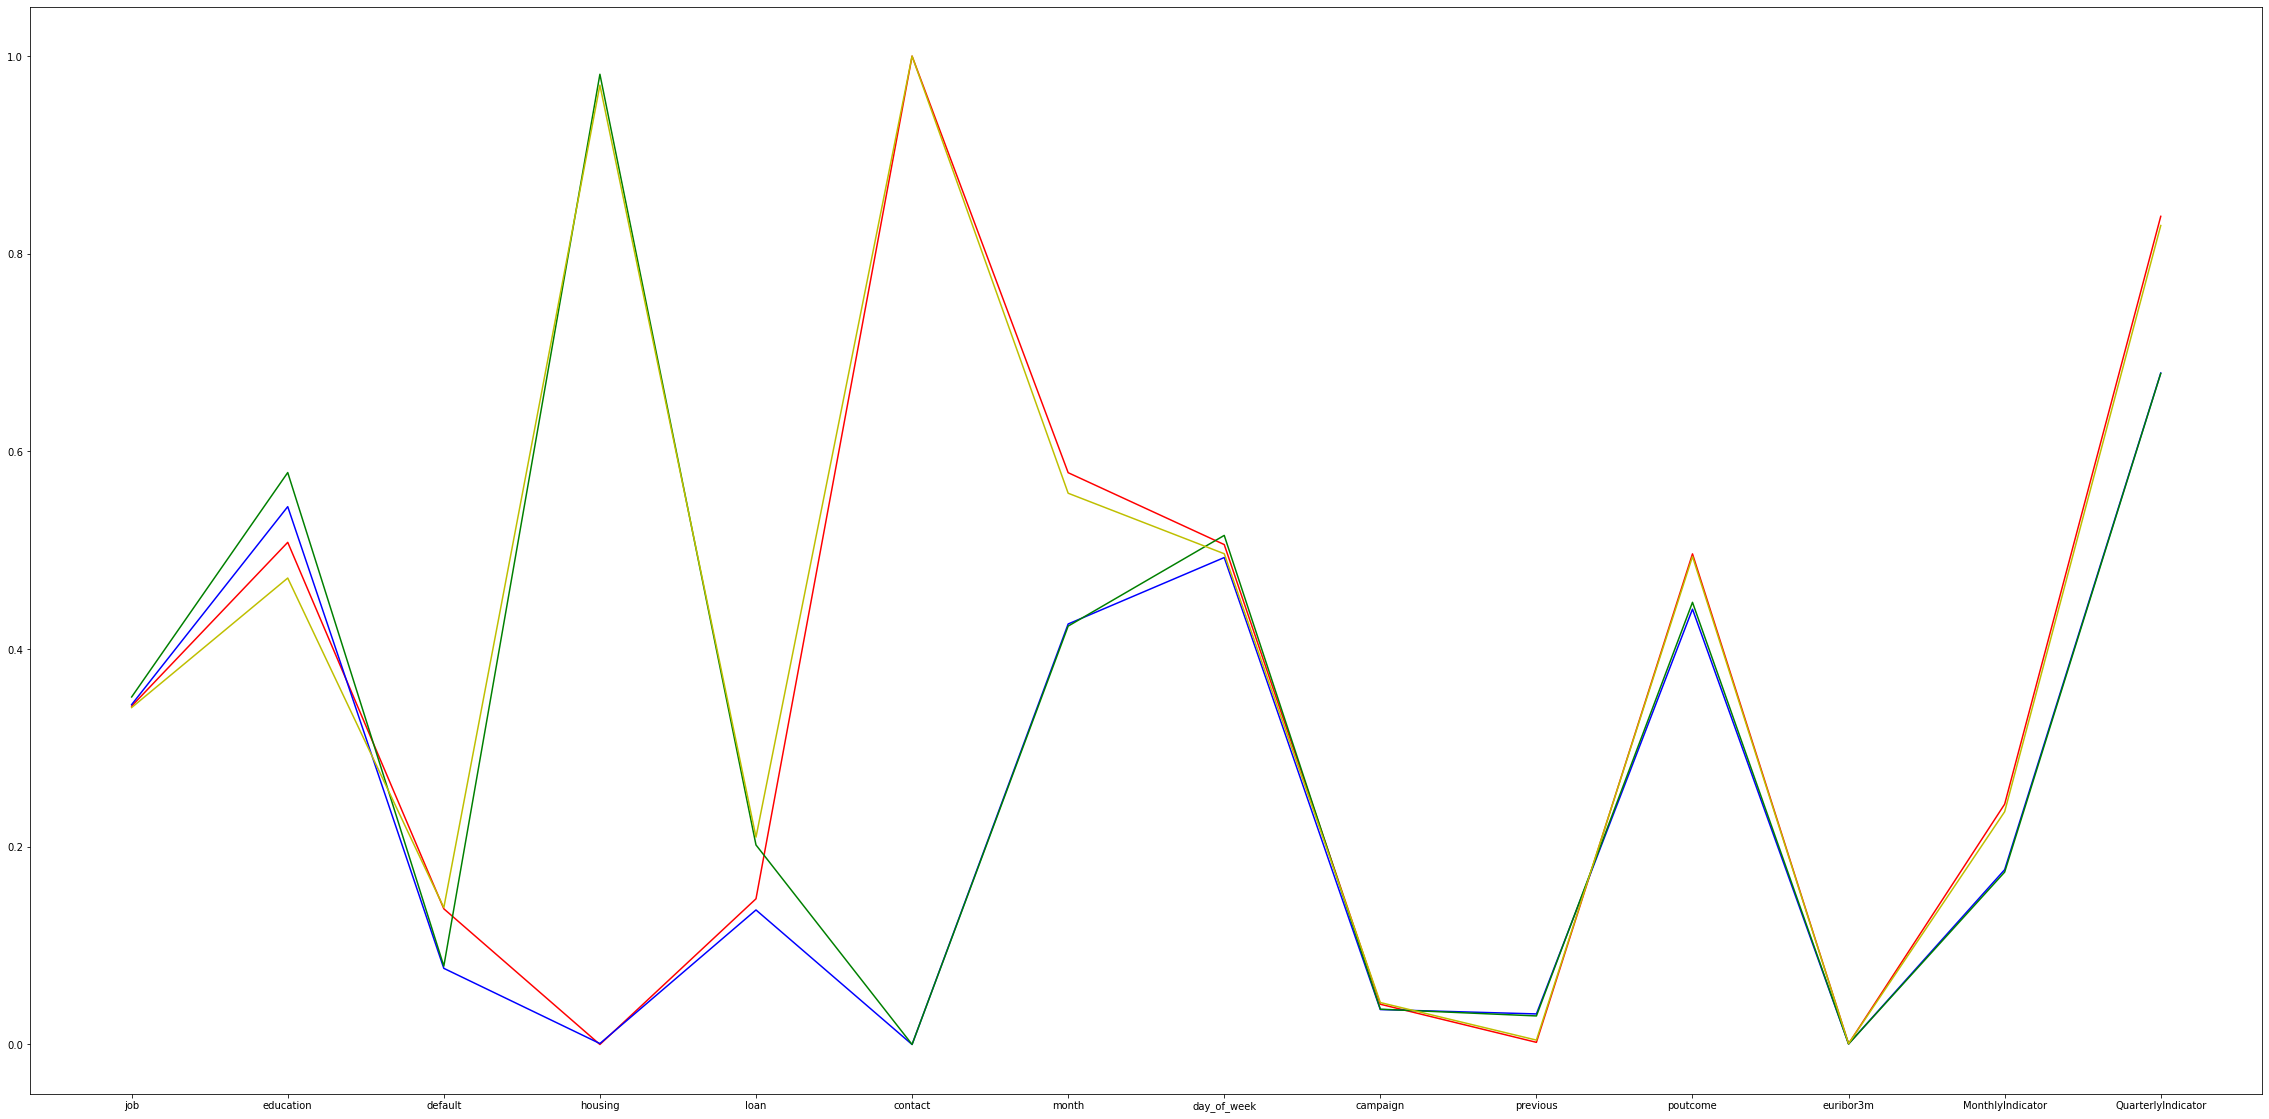

In [473]:
plt.close()
plt.plot(centers3[0,:], c = 'r')
plt.plot(centers3[1,:], c = 'b')
plt.plot(centers3[2,:], c = 'g')
plt.plot(centers3[3,:], c = 'y')
plt.rcParams['figure.figsize']=[40,20]
plt.xticks(list(range(14)), list(df_no_outliers3.columns[:-1]), )
plt.show()

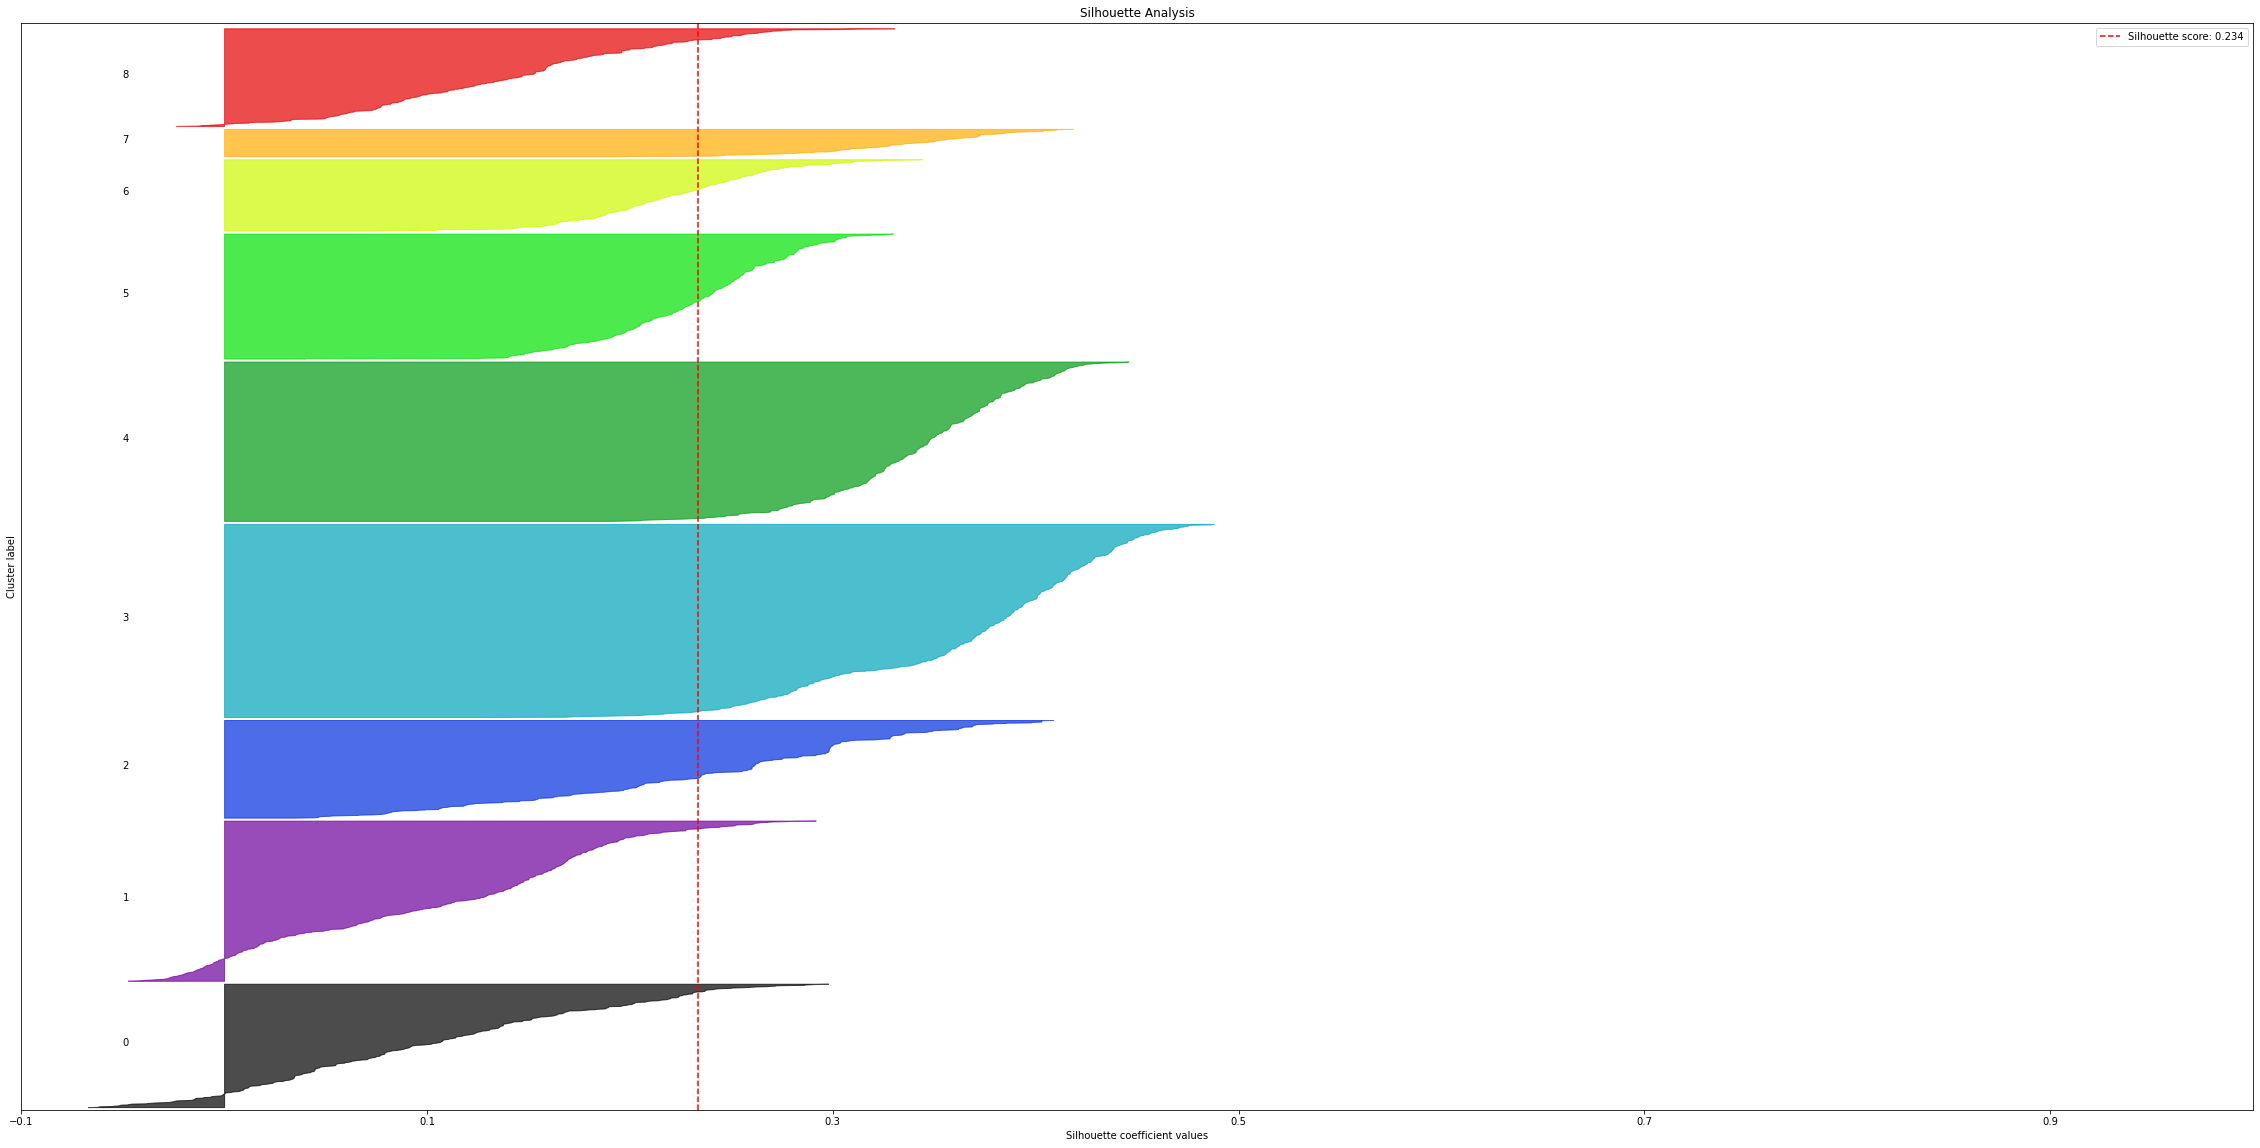

In [474]:
#!pip install scikit-plot
import scikitplot as skplt
cluster_labels = KMeans(n_clusters=k, max_iter=100).fit_predict(df_no_outliers3)
skplt.metrics.plot_silhouette(df_no_outliers3, cluster_labels)
plt.show()

In [475]:
df_no_outliers4 = df_no_outliers3.drop('Cluster3', axis=1)
df_no_outliers4

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.282582,1.000


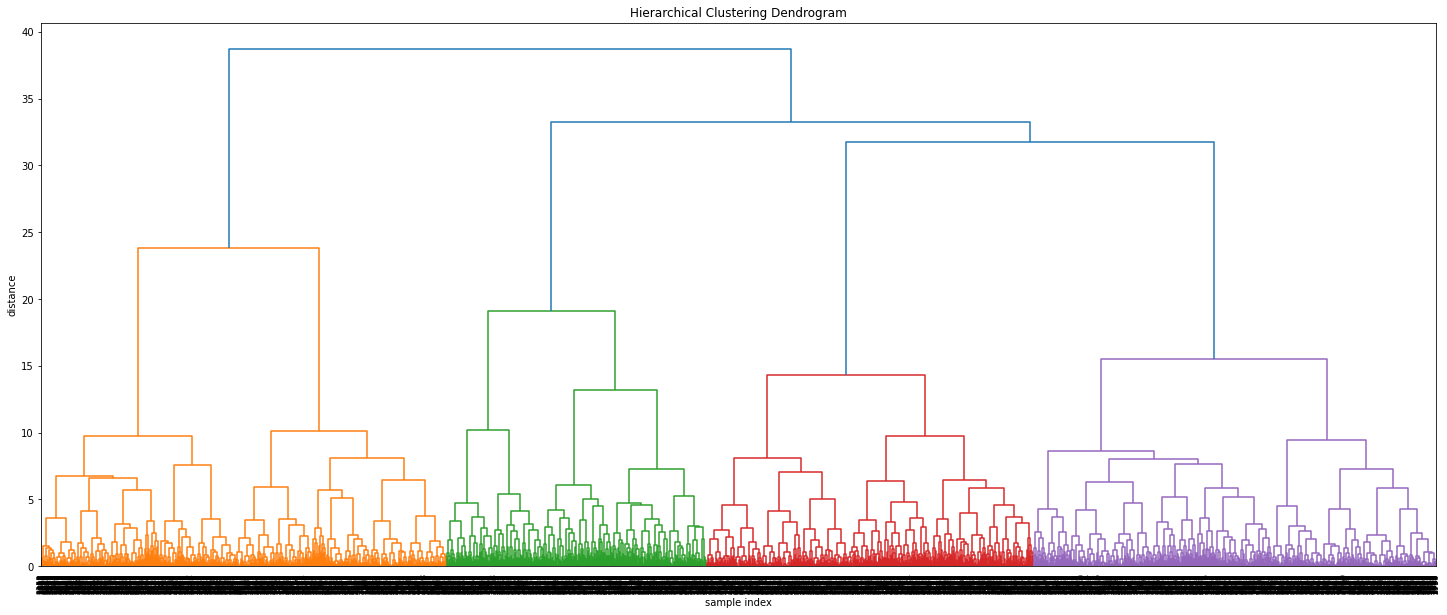

In [476]:
#hijerarhijski klaster model
from scipy.cluster.hierarchy import dendrogram, linkage
 
Z = linkage(df_no_outliers4, 'ward')
# Racunanje dendograma
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=8., 
)
plt.show()

### BONUS 1: Split the initial data set by the clusters you got (either in task 9 or in task 12) and store them in separate variables. On each of the thus obtained subsets of the data, train at least one predictive model and compare the results between the subsets of the data and with the results obtained before splitting the data set by clusters.

In [477]:
r2 = MinMaxScaler(feature_range=(0, 1))
df_norm_bonus = r1.fit_transform(df2)
df_norm_bonus = pd.DataFrame(df_norm_bonus, columns = ['job','education', 'default', 'housing', 'loan','contact', 'month','day_of_week', 
                                           'campaign', 'previous','poutcome','euribor3m','y','MonthlyIndicator', 
                                           'QuarterlyIndicator'])
df_norm_bonus

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.0,0.075025,0.424
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.0,0.287454,0.816
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.0,0.191402,1.000
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.0,0.191402,1.000
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.0,0.162854,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.0,0.163204,1.000
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.0,0.163204,1.000
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.0,0.075025,0.424
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.0,0.282582,1.000


In [478]:
brojac=0
while (brojac<len(a2)): 
    num=a2[brojac]
    df_norm_bonus = df_norm_bonus.drop(num)
    brojac+=1

In [479]:
df_norm_bonus['Cluster3'] = df_no_outliers3['Cluster3']
df_norm_bonus

,job,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,euribor3m,y,MonthlyIndicator,QuarterlyIndicator,Cluster3
0,0.090909,0.285714,0.0,1.0,0.0,0.0,0.666667,0.00,0.029412,0.000000,0.5,0.000133,0.0,0.075025,0.424,2
1,0.636364,0.428571,0.0,0.0,0.0,1.0,0.666667,0.00,0.088235,0.000000,0.5,0.000828,0.0,0.287454,0.816,0
2,0.636364,0.428571,0.0,1.0,0.0,1.0,0.444444,1.00,0.000000,0.000000,0.5,0.000849,0.0,0.191402,1.000,3
3,0.636364,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.058824,0.000000,0.5,0.000848,0.0,0.191402,1.000,3
4,0.000000,0.857143,0.0,1.0,0.0,0.0,0.777778,0.25,0.000000,0.000000,0.5,0.000697,0.0,0.162854,0.800,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,0.142857,0.0,1.0,1.0,0.0,0.333333,0.50,0.000000,0.000000,0.5,0.000848,0.0,0.163204,1.000,2
4115,0.000000,0.428571,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,0.000000,0.5,0.000848,0.0,0.163204,1.000,3
4116,0.727273,0.428571,0.0,0.0,0.0,0.0,0.666667,0.25,0.029412,0.166667,0.0,0.000141,0.0,0.075025,0.424,1
4117,0.000000,0.428571,0.0,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.5,0.000849,0.0,0.282582,1.000,1


In [480]:
df_c1 = df_norm_bonus[df_norm_bonus['Cluster3']==0]
df_c2 = df_norm_bonus[df_norm_bonus['Cluster3']==1]
df_c3 = df_norm_bonus[df_norm_bonus['Cluster3']==2]
df_c4 = df_norm_bonus[df_norm_bonus['Cluster3']==3]

df_c1.to_csv('Klaster1.csv')
df_c2.to_csv('Klaster2.csv')
df_c3.to_csv('Klaster3.csv')
df_c4.to_csv('Klaster4.csv')
df_norm_bonus.to_csv('Bonus.csv')

In [481]:
dfb = pd.read_csv('Bonus.csv', index_col=0)
dfb1 = pd.read_csv('Klaster1.csv', index_col=0)
dfb2 = pd.read_csv('Klaster2.csv', index_col=0)
dfb3 = pd.read_csv('Klaster3.csv', index_col=0)
dfb4 = pd.read_csv('Klaster4.csv', index_col=0)

In [482]:
#prvi klaster
X1 = dfb1.drop('Cluster3', axis=1)
X1 = X1.drop('y', axis =1)
Y1 = dfb1['y']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=13)

In [483]:
#drugi klaster
X2 = dfb2.drop('Cluster3', axis=1)
X2 = X2.drop('y', axis =1)
Y2 = dfb2['y']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=13)

In [484]:
#treci klaster
X3 = dfb3.drop('Cluster3', axis=1)
X3 = X3.drop('y', axis =1)
Y3 = dfb3['y']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=13)

In [485]:
#cetvrti klaster
X4 = dfb4.drop('Cluster3', axis=1)
X4 = X4.drop('y', axis =1)
Y4 = dfb4['y']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.3, random_state=13)

In [486]:
#ceo df
X = dfb.drop('Cluster3', axis=1)
X = X.drop('y', axis =1)
Y = dfb['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

In [487]:
pd.crosstab(dfb['y'], dfb['Cluster3'])

Cluster3,0,1,2,3
y,,,,
0.0,650,916,1269,684
1.0,42,140,177,31


In [488]:
rfModelB = DecisionTreeClassifier(max_depth = 10)
rfModelB.fit(X_train, y_train)
predictionsB = rfModelB.predict(X_train)
pd.DataFrame({'stvarno':y_train, 'predvidjeno':predictionsB}).head(13)
accB = accuracy_score(y_train, predictionsB)
print(f'Tacnost predvidjanja je {accB: .2f}')

Tacnost predvidjanja je  0.95


In [489]:
#random forest za prvi klaster
rfModelB1 = DecisionTreeClassifier(max_depth = 10)
rfModelB1.fit(X_train1, y_train1)
predictionsB1 = rfModelB1.predict(X_train1)
accB1 = accuracy_score(y_train1, predictionsB1)
print(f'Tacnost predvidjanja je {accB1: .2f}')

Tacnost predvidjanja je  0.96


In [490]:
#random forest za drugi klaster
rfModelB2 = DecisionTreeClassifier(max_depth = 10)
rfModelB2.fit(X_train2, y_train2)
predictionsB2 = rfModelB2.predict(X_train2)
accB2 = accuracy_score(y_train2, predictionsB2)
print(f'Tacnost predvidjanja je {accB2: .2f}')

Tacnost predvidjanja je  0.96


In [491]:
#random forest za treci klaster
rfModelB3 = DecisionTreeClassifier(max_depth = 10)
rfModelB3.fit(X_train3, y_train3)
predictionsB3 = rfModelB3.predict(X_train3)
accB3 = accuracy_score(y_train3, predictionsB3)
print(f'Tacnost predvidjanja je {accB3: .2f}')

Tacnost predvidjanja je  0.95


In [492]:
#random forest za cetvrti klaster
rfModelB4 = DecisionTreeClassifier(max_depth = 10)
rfModelB4.fit(X_train4, y_train4)
predictionsB4 = rfModelB4.predict(X_train4)
accB4 = accuracy_score(y_train4, predictionsB4)
print(f'Tacnost predvidjanja je {accB4: .2f}')

Tacnost predvidjanja je  0.99


In [493]:
#matrica konfuzije za ceo df
confusion_matrix(y_test, rfModelB.predict(X_test))

array([[1009,   49],
       [  92,   23]], dtype=int64)

In [495]:
#matrica konfuzije za prvi klaster
confusion_matrix(y_test1, rfModelB1.predict(X_test1))

array([[192,   5],
       [ 11,   0]], dtype=int64)

In [497]:
#matrica konfuzije za drugi klaster
confusion_matrix(y_test2, rfModelB2.predict(X_test2))

array([[246,  23],
       [ 37,  11]], dtype=int64)

In [498]:
#matrica konfuzije za treci klaster
confusion_matrix(y_test3, rfModelB3.predict(X_test3))

array([[359,  22],
       [ 40,  13]], dtype=int64)

In [499]:
#matrica konfuzije za cetvrti klaster
confusion_matrix(y_test4, rfModelB4.predict(X_test4))

array([[204,   2],
       [  7,   2]], dtype=int64)